## This notebook uses each one of the 52 prediction models trained on autoML.ipynb to generate a gaussian_kde.

In [1]:
%load_ext autoreload
%autoreload 2
import os 
import sys
import h2o

import pandas as pd

In [36]:
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.modeling.functions_autoML import (read_models,
                                           gen_models_predictions,
                                           gen_gaussian_kde, 
                                           print_gaussian_kde,
                                           gen_df_gaussian_kde)

In [3]:
df = pd.read_pickle("../../data/structured/df.pkl")
#IA Filter
df = df.loc[df.type_bool == True]

In [38]:
BEST_MODEL = 'StackedEnsemble_AllModels_AutoML_20201223_115349.zip'

In [4]:
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /home/fmoliveira/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8qcnta52
  JVM stdout: /tmp/tmp8qcnta52/h2o_fmoliveira_started_from_python.out
  JVM stderr: /tmp/tmp8qcnta52/h2o_fmoliveira_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,2 months and 29 days
H2O_cluster_name:,H2O_from_python_fmoliveira_zqfn5z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.881 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


### Creating DataFrame with predictions

In [5]:
df_predictions = gen_models_predictions(df, read_models('../../models/mojo_50_ensemble'))

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_1


Model Summary: 


,,number_of_trees
0,,36.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0002576202145655505
RMSE: 0.01605055184613758
MAE: 0.011345068588852883
RMSLE: 0.009237832371080782
Mean Residual Deviance: 0.0002576202145655505

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010270849997187205
RMSE: 0.10134520214192286
MAE: 0.0782493313723335
RMSLE: 0.05841930761855552
Mean Residual Deviance: 0.010270849997187205

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07824933,0.0018442776,0.08068828,0.07705235,0.078270726,0.07597058,0.079264715
1,mean_residual_deviance,0.01027085,2.8461879E-4,0.010602201,0.009977879,0.010302224,0.010485961,0.009985984
2,mse,0.01027085,2.8461879E-4,0.010602201,0.009977879,0.010302224,0.010485961,0.009985984
3,r2,0.7970469,0.0051457724,0.7892313,0.80140847,0.80200183,0.79655325,0.79603976
4,residual_deviance,0.01027085,2.8461879E-4,0.010602201,0.009977879,0.010302224,0.010485961,0.009985984
5,rmse,0.10133742,0.0014045582,0.102966994,0.09988933,0.10149987,0.10240098,0.0999299
6,rmsle,0.058412317,0.001010319,0.05919624,0.05717689,0.058790028,0.059397046,0.05750138



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:53:52,2.310 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:53:52,2.429 sec,5.0,0.093920,0.072613,0.008821
2,,2020-12-23 12:53:52,2.526 sec,10.0,0.056854,0.042125,0.003232
3,,2020-12-23 12:53:52,2.607 sec,15.0,0.042937,0.030708,0.001844
4,,2020-12-23 12:53:52,2.702 sec,20.0,0.033473,0.023950,0.001120
5,,2020-12-23 12:53:52,2.753 sec,25.0,0.027400,0.019412,0.000751
6,,2020-12-23 12:53:52,2.860 sec,30.0,0.020947,0.014768,0.000439
7,,2020-12-23 12:53:53,2.927 sec,35.0,0.016644,0.011799,0.000277
8,,2020-12-23 12:53:53,2.950 sec,36.0,0.016051,0.011345,0.000258



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,57.002499,1.000000,0.336219
1,f10,33.463177,0.587048,0.197377
2,f2,16.324738,0.286386,0.096289
3,f6,9.339149,0.163838,0.055085
4,f5,7.155381,0.125527,0.042205
5,f4,4.459772,0.078238,0.026305
6,f19,4.048347,0.071021,0.023878
7,f15,3.879896,0.068065,0.022885
8,f8,3.828011,0.067155,0.022579
9,f12,3.776975,0.066260,0.022278



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_2


Model Summary: 


,,number_of_trees
0,,81.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.003449590173148637
RMSE: 0.05873321184090512
MAE: 0.0444760606087306
RMSLE: 0.034434131911605145
Mean Residual Deviance: 0.003449590173148637

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009622467297289848
RMSE: 0.09809417565426526
MAE: 0.07517126009598667
RMSLE: 0.05698315319573924
Mean Residual Deviance: 0.009622467297289848

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07517126,0.0018697479,0.0773803,0.07240007,0.07538595,0.07453319,0.076156795
1,mean_residual_deviance,0.009622468,6.1486784E-4,0.010270718,0.008700898,0.009724342,0.010038081,0.009378298
2,mse,0.009622468,6.1486784E-4,0.010270718,0.008700898,0.009724342,0.010038081,0.009378298
3,r2,0.8098896,0.011387813,0.79582113,0.8268244,0.81310815,0.80524296,0.80845153
4,residual_deviance,0.009622468,6.1486784E-4,0.010270718,0.008700898,0.009724342,0.010038081,0.009378298
5,rmse,0.09805341,0.0031613642,0.10134455,0.0932786,0.09861208,0.10019022,0.09684161
6,rmsle,0.056948908,0.0022083514,0.05859666,0.05346355,0.057799857,0.058752507,0.056131978



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:08,31.519 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:08,31.543 sec,5.0,0.134260,0.107543,0.018026
2,,2020-12-23 12:55:08,31.565 sec,10.0,0.102758,0.082034,0.010559
3,,2020-12-23 12:55:08,31.589 sec,15.0,0.092629,0.072693,0.008580
4,,2020-12-23 12:55:08,31.613 sec,20.0,0.086577,0.067357,0.007496
5,,2020-12-23 12:55:08,31.638 sec,25.0,0.082354,0.063487,0.006782
6,,2020-12-23 12:55:08,31.666 sec,30.0,0.078988,0.060823,0.006239
7,,2020-12-23 12:55:08,31.695 sec,35.0,0.075851,0.058184,0.005753
8,,2020-12-23 12:55:08,31.730 sec,40.0,0.073032,0.055976,0.005334
9,,2020-12-23 12:55:08,31.766 sec,45.0,0.070686,0.054014,0.004997



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,53.464020,1.000000,0.394407
1,f5,28.800850,0.538696,0.212465
2,f3,19.658848,0.367702,0.145024
3,f2,7.521853,0.140690,0.055489
4,f10,2.953883,0.055250,0.021791
5,f20,2.947923,0.055138,0.021747
6,f18,2.075253,0.038816,0.015309
7,f15,1.677121,0.031369,0.012372
8,f7,1.637585,0.030630,0.012081
9,f9,1.597990,0.029889,0.011788



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_3


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,58.0,58.0,77203.0,10.0,10.0,10.0,41.0,139.0,101.344826




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00168339240472856
RMSE: 0.04102916529407538
MAE: 0.030311429925701197
RMSLE: 0.023290549709901073
Mean Residual Deviance: 0.00168339240472856

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.008489202349413135
RMSE: 0.092136867482095
MAE: 0.07042191153668256
RMSLE: 0.0530994284800469
Mean Residual Deviance: 0.008489202349413135

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07042191,0.0019520238,0.07290732,0.06904431,0.06978172,0.06836501,0.072011195
1,mean_residual_deviance,0.008489203,3.941398E-4,0.008934577,0.008162615,0.008146048,0.00889587,0.008306902
2,mse,0.008489203,3.941398E-4,0.008934577,0.008162615,0.008146048,0.00889587,0.008306902
3,r2,0.8322202,0.008332343,0.8223832,0.837538,0.84344137,0.8274039,0.8303344
4,residual_deviance,0.008489203,3.941398E-4,0.008934577,0.008162615,0.008146048,0.00889587,0.008306902
5,rmse,0.09211713,0.0021319084,0.09452289,0.09034719,0.09025546,0.09431792,0.09114221
6,rmsle,0.053080652,0.0015786223,0.054330003,0.051717352,0.05168946,0.055152424,0.05251402



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:22,2.223 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:54:22,2.257 sec,5.0,0.150291,0.124022,0.022588
2,,2020-12-23 12:54:22,2.290 sec,10.0,0.108589,0.089334,0.011792
3,,2020-12-23 12:54:22,2.320 sec,15.0,0.084857,0.069140,0.007201
4,,2020-12-23 12:54:22,2.352 sec,20.0,0.071885,0.057512,0.005167
5,,2020-12-23 12:54:22,2.380 sec,25.0,0.064532,0.050556,0.004164
6,,2020-12-23 12:54:23,2.409 sec,30.0,0.059363,0.045595,0.003524
7,,2020-12-23 12:54:23,2.486 sec,35.0,0.054609,0.041486,0.002982
8,,2020-12-23 12:54:23,2.523 sec,40.0,0.050707,0.038182,0.002571
9,,2020-12-23 12:54:23,2.558 sec,45.0,0.047651,0.035679,0.002271



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,279.430267,1.000000,0.465685
1,f10,64.773460,0.231805,0.107948
2,f5,49.071880,0.175614,0.081781
3,f3,48.448292,0.173382,0.080742
4,f6,23.042854,0.082464,0.038402
5,f2,18.020248,0.064489,0.030032
6,f8,13.372480,0.047856,0.022286
7,f4,12.753193,0.045640,0.021254
8,f15,12.383427,0.044317,0.020638
9,f18,9.280584,0.033213,0.015467



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_4


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,74.0,74.0,60945.0,6.0,6.0,6.0,48.0,64.0,60.945946




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0028077700688571797
RMSE: 0.0529883956056152
MAE: 0.03952029500960135
RMSLE: 0.029454230635565445
Mean Residual Deviance: 0.0028077700688571797

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.008737202162205302
RMSE: 0.09347300231727503
MAE: 0.07202928786639987
RMSLE: 0.05393842221983979
Mean Residual Deviance: 0.008737202162205302

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.072029285,0.0014008329,0.07370584,0.07174365,0.069871284,0.072466284,0.07235939
1,mean_residual_deviance,0.008737202,5.779503E-4,0.009394871,0.008572953,0.00806779,0.009279622,0.008370775
2,mse,0.008737202,5.779503E-4,0.009394871,0.008572953,0.00806779,0.009279622,0.008370775
3,r2,0.82730746,0.011941808,0.8132327,0.829371,0.8449454,0.81995845,0.82902986
4,residual_deviance,0.008737202,5.779503E-4,0.009394871,0.008572953,0.00806779,0.009279622,0.008370775
5,rmse,0.093432195,0.00308754,0.09692714,0.09259024,0.089820884,0.09633079,0.09149194
6,rmsle,0.053912308,0.0018763738,0.055789195,0.05318798,0.051949594,0.056028426,0.052606337



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:11,2.579 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:54:11,2.631 sec,5.0,0.155375,0.129232,0.024141
2,,2020-12-23 12:54:11,2.680 sec,10.0,0.118704,0.099035,0.014091
3,,2020-12-23 12:54:12,2.728 sec,15.0,0.097633,0.080657,0.009532
4,,2020-12-23 12:54:12,2.772 sec,20.0,0.086767,0.070300,0.007529
5,,2020-12-23 12:54:12,2.803 sec,25.0,0.079955,0.063569,0.006393
6,,2020-12-23 12:54:12,2.838 sec,30.0,0.075568,0.059011,0.005710
7,,2020-12-23 12:54:12,2.865 sec,35.0,0.072146,0.055597,0.005205
8,,2020-12-23 12:54:12,2.888 sec,40.0,0.068857,0.052872,0.004741
9,,2020-12-23 12:54:12,2.920 sec,45.0,0.065704,0.050194,0.004317



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,301.180664,1.000000,0.506521
1,f10,83.909729,0.278603,0.141118
2,f5,36.052742,0.119705,0.060633
3,f2,26.658642,0.088514,0.044834
4,f3,21.819723,0.072447,0.036696
5,f12,13.311099,0.044196,0.022386
6,f11,12.304041,0.040853,0.020693
7,f15,11.527213,0.038273,0.019386
8,f18,10.171817,0.033773,0.017107
9,f6,10.168953,0.033764,0.017102



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_5


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 11.001 weights/biases, 139,5 KB, 892.500 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,20,,,,,,,,,
1,,2,500,RectifierDropout,0,0,0,0.0132112,0.055586,0,-0.00929215,0.146307,0.321463,0.252627
2,,3,1,Linear,,0,0,0.000280946,0.000201558,0,0.00432623,0.146405,-0.24517,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.010449830091039378
RMSE: 0.10222441044603475
MAE: 0.07487983751277626
RMSLE: 0.06089381655331052
Mean Residual Deviance: 0.010449830091039378

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.03803401797065738
RMSE: 0.1950231216308912
MAE: 0.10351359523858106
RMSLE: NaN
Mean Residual Deviance: 0.03803401797065738

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.1035136,0.027273184,0.08317029,0.11994855,0.14380275,0.08710529,0.0835411
1,mean_residual_deviance,0.038034018,0.043996457,0.013881992,0.025831355,0.11595613,0.023363652,0.011136961
2,mse,0.038034018,0.043996457,0.013881992,0.025831355,0.11595613,0.023363652,0.011136961
3,r2,0.26011607,0.84068924,0.7240301,0.48587385,-1.2285576,0.54670256,0.77253145
4,residual_deviance,0.038034018,0.043996457,0.013881992,0.025831355,0.11595613,0.023363652,0.011136961
5,rmse,0.17549002,0.09511357,0.117821865,0.16072136,0.34052333,0.15285173,0.1055318
6,rmsle,0.08981356,0.03284352,0.07262053,0.12768458,NaN,NaN,0.06913557



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:16:31,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:16:33,20 min 34.305 sec,12125 obs/sec,10.0,1,25500.0,0.221913,0.049245,0.124177,0.029099
2,,2020-12-23 13:16:39,20 min 40.639 sec,12122 obs/sec,40.0,4,102000.0,0.194515,0.037836,0.117318,0.254038
3,,2020-12-23 13:16:46,20 min 46.877 sec,12200 obs/sec,70.0,7,178500.0,0.217771,0.047424,0.113703,0.065002
4,,2020-12-23 13:16:52,20 min 53.062 sec,12264 obs/sec,100.0,10,255000.0,0.167221,0.027963,0.101555,0.448694
5,,2020-12-23 13:16:58,20 min 59.137 sec,12349 obs/sec,130.0,13,331500.0,0.140308,0.019686,0.093850,0.611871
6,,2020-12-23 13:17:04,21 min 5.432 sec,12319 obs/sec,160.0,16,408000.0,0.124634,0.015534,0.086703,0.693743
7,,2020-12-23 13:17:10,21 min 11.675 sec,12319 obs/sec,190.0,19,484500.0,0.125269,0.015692,0.084382,0.690615
8,,2020-12-23 13:17:17,21 min 18.078 sec,12274 obs/sec,220.0,22,561000.0,0.115446,0.013328,0.082318,0.737233
9,,2020-12-23 13:17:23,21 min 24.425 sec,12252 obs/sec,250.0,25,637500.0,0.106559,0.011355,0.079213,0.776133



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.080842
1,f4,0.863840,0.863840,0.069835
2,f10,0.759976,0.759976,0.061438
3,f6,0.743024,0.743024,0.060068
4,f2,0.721019,0.721019,0.058289
5,f3,0.668249,0.668249,0.054023
6,f12,0.656361,0.656361,0.053061
7,f11,0.651482,0.651482,0.052667
8,f19,0.587069,0.587069,0.047460
9,f18,0.582281,0.582281,0.047073



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_6


Model Summary: 


,,number_of_trees
0,,36.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 1.449156788641303e-06
RMSE: 0.0012038092825033802
MAE: 0.0007946525002811469
RMSLE: 0.0006991365372607097
Mean Residual Deviance: 1.449156788641303e-06

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.01032499066480222
RMSE: 0.10161196122899223
MAE: 0.07675059109195774
RMSLE: 0.05839725265045028
Mean Residual Deviance: 0.01032499066480222

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07675059,0.0019523201,0.07927377,0.07428233,0.07565754,0.07654375,0.07799556
1,mean_residual_deviance,0.01032499,6.5939955E-4,0.011276458,0.0097091375,0.010092531,0.010717995,0.00982883
2,mse,0.01032499,6.5939955E-4,0.011276458,0.0097091375,0.010092531,0.010717995,0.00982883
3,r2,0.7959835,0.012742118,0.7758273,0.8067573,0.80603194,0.7920514,0.7992496
4,residual_deviance,0.01032499,6.5939955E-4,0.011276458,0.0097091375,0.010092531,0.010717995,0.00982883
5,rmse,0.10157108,0.003222038,0.10619067,0.09853496,0.10046159,0.103527755,0.09914046
6,rmsle,0.05836692,0.0021040388,0.06125395,0.056146473,0.05770065,0.05978075,0.05695279



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:23,46.341 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:23,46.421 sec,5.0,0.073877,0.055556,0.005458
2,,2020-12-23 12:55:23,46.501 sec,10.0,0.023335,0.015442,0.000545
3,,2020-12-23 12:55:23,46.584 sec,15.0,0.010209,0.006291,0.000104
4,,2020-12-23 12:55:23,46.694 sec,20.0,0.004698,0.002921,0.000022
5,,2020-12-23 12:55:23,46.786 sec,25.0,0.002562,0.001621,0.000007
6,,2020-12-23 12:55:23,46.877 sec,30.0,0.001673,0.001078,0.000003
7,,2020-12-23 12:55:23,46.957 sec,35.0,0.001253,0.000825,0.000002
8,,2020-12-23 12:55:23,46.980 sec,36.0,0.001204,0.000795,0.000001



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,150.309677,1.000000,0.629327
1,f10,35.988251,0.239427,0.150678
2,f5,12.116771,0.080612,0.050731
3,f3,4.678188,0.031124,0.019587
4,f2,4.071044,0.027084,0.017045
5,f15,4.051388,0.026954,0.016963
6,f18,3.234993,0.021522,0.013544
7,f19,3.152101,0.020971,0.013197
8,f20,2.516104,0.016739,0.010535
9,f12,2.276321,0.015144,0.009531



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_7


Model Summary: 


,,number_of_trees
0,,54.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0017361368010883613
RMSE: 0.04166697494525324
MAE: 0.030811560806982656
RMSLE: 0.02466753849937284
Mean Residual Deviance: 0.0017361368010883613

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009595363058290483
RMSE: 0.0979559240591935
MAE: 0.0754300717848773
RMSLE: 0.05658327303374209
Mean Residual Deviance: 0.009595363058290483

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07543007,0.001535563,0.075910024,0.07458855,0.0776597,0.073553376,0.07543871
1,mean_residual_deviance,0.009595363,3.7560012E-4,0.009737352,0.009371737,0.010154072,0.009541458,0.009172196
2,mse,0.009595363,3.7560012E-4,0.009737352,0.009371737,0.010154072,0.009541458,0.009172196
3,r2,0.8104571,0.004505843,0.8064243,0.8134726,0.80484915,0.8148783,0.8126611
4,residual_deviance,0.009595363,3.7560012E-4,0.009737352,0.009371737,0.010154072,0.009541458,0.009172196
5,rmse,0.097941026,0.0019098709,0.09867802,0.09680773,0.10076742,0.09768039,0.09577158
6,rmsle,0.05656804,0.0014677192,0.05687074,0.0553302,0.05861167,0.057063118,0.054964487



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:15,38.801 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:15,38.837 sec,5.0,0.112506,0.088413,0.012658
2,,2020-12-23 12:55:15,38.871 sec,10.0,0.080532,0.061888,0.006485
3,,2020-12-23 12:55:15,38.906 sec,15.0,0.068640,0.051914,0.004711
4,,2020-12-23 12:55:15,38.971 sec,20.0,0.061354,0.046019,0.003764
5,,2020-12-23 12:55:15,39.031 sec,25.0,0.055959,0.041830,0.003131
6,,2020-12-23 12:55:15,39.064 sec,30.0,0.052136,0.038781,0.002718
7,,2020-12-23 12:55:16,39.099 sec,35.0,0.049138,0.036460,0.002415
8,,2020-12-23 12:55:16,39.131 sec,40.0,0.046741,0.034593,0.002185
9,,2020-12-23 12:55:16,39.162 sec,45.0,0.044393,0.032814,0.001971



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,79.844078,1.000000,0.454411
1,f3,26.228336,0.328494,0.149271
2,f10,17.761913,0.222457,0.101087
3,f2,10.000429,0.125249,0.056915
4,f5,8.106318,0.101527,0.046135
5,f13,4.306364,0.053935,0.024509
6,f9,3.678634,0.046073,0.020936
7,f12,3.617086,0.045302,0.020586
8,f20,3.161913,0.039601,0.017995
9,f18,2.499008,0.031299,0.014222



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_8


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,94.0,94.0,19791.0,4.0,4.0,4.0,6.0,16.0,12.138298




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.007883399441632208
RMSE: 0.08878850962614593
MAE: 0.06932659250410164
RMSLE: 0.05091408615791838
Mean Residual Deviance: 0.007883399441632208

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010060880867186388
RMSE: 0.10030394243092536
MAE: 0.0785883959146178
RMSLE: 0.05808801487192375
Mean Residual Deviance: 0.010060880867186388

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.0785884,0.0010123586,0.07964065,0.07883955,0.07693019,0.07852438,0.079007216
1,mean_residual_deviance,0.010060881,5.898021E-4,0.010625474,0.009851849,0.009589912,0.010751251,0.009485917
2,mse,0.010060881,5.898021E-4,0.010625474,0.009851849,0.009589912,0.010751251,0.009485917
3,r2,0.80120736,0.011106156,0.78876865,0.8039169,0.81569177,0.79140615,0.80625343
4,residual_deviance,0.010060881,5.898021E-4,0.010625474,0.009851849,0.009589912,0.010751251,0.009485917
5,rmse,0.10026969,0.002930598,0.103079945,0.09925648,0.0979281,0.10368824,0.09739567
6,rmsle,0.05806609,0.0017842797,0.0592231,0.05713198,0.056956608,0.06061881,0.056399938



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:33,0.911 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:33,0.921 sec,5.0,0.171593,0.142834,0.029444
2,,2020-12-23 12:55:33,0.931 sec,10.0,0.141713,0.118340,0.020082
3,,2020-12-23 12:55:33,0.940 sec,15.0,0.123727,0.102349,0.015308
4,,2020-12-23 12:55:33,0.947 sec,20.0,0.113317,0.092492,0.012841
5,,2020-12-23 12:55:33,0.954 sec,25.0,0.107449,0.086736,0.011545
6,,2020-12-23 12:55:33,0.960 sec,30.0,0.103846,0.083141,0.010784
7,,2020-12-23 12:55:33,0.967 sec,35.0,0.101092,0.080421,0.010220
8,,2020-12-23 12:55:33,0.974 sec,40.0,0.099392,0.078753,0.009879
9,,2020-12-23 12:55:33,0.981 sec,45.0,0.097892,0.077269,0.009583



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,143.424454,1.000000,0.261378
1,f8,74.126030,0.516830,0.135088
2,f10,65.343941,0.455598,0.119083
3,f3,42.019531,0.292973,0.076577
4,f2,34.977661,0.243875,0.063744
5,f6,31.373987,0.218749,0.057176
6,f11,20.499119,0.142926,0.037358
7,f12,19.654337,0.137036,0.035818
8,f13,18.107977,0.126254,0.033000
9,f9,16.890257,0.117764,0.030781



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_9


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 441 weights/biases, 11,3 KB, 26.492 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.0013731,0.000980506,0,-0.0221547,0.263455,0.539,0.189611
2,,3,10,Rectifier,0,0,0,0.00072602,0.000505354,0,-0.0520354,0.337251,0.979471,0.0690328
3,,4,10,Rectifier,0,0,0,0.00126318,0.00120359,0,-0.0397073,0.333339,0.984058,0.0384217
4,,5,1,Linear,,0,0,0.000469831,0.000302479,0,-0.15726,0.46035,0.0474345,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.012450683875298652
RMSE: 0.11158263249851498
MAE: 0.08616991500217981
RMSLE: NaN
Mean Residual Deviance: 0.012450683875298652

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.018780915681971568
RMSE: 0.13704348099041985
MAE: 0.09234290536308525
RMSLE: NaN
Mean Residual Deviance: 0.018780915681971568

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.092342906,7.755261E-4,0.09197786,0.093437985,0.09195168,0.09151667,0.09283033
1,mean_residual_deviance,0.018780915,0.0074679684,0.03137612,0.01481433,0.019895572,0.01393227,0.013886286
2,mse,0.018780915,0.0074679684,0.03137612,0.01481433,0.019895572,0.01393227,0.013886286
3,r2,0.6290186,0.14797163,0.37625188,0.7051477,0.61762756,0.7296886,0.71637744
4,residual_deviance,0.018780915,0.0074679684,0.03137612,0.01481433,0.019895572,0.01393227,0.013886286
5,rmse,0.1351548,0.025349973,0.17713305,0.12171413,0.14105166,0.11803503,0.11784009
6,rmsle,0.07412777,0.003004175,NaN,0.07707179,NaN,0.07106686,0.07424467



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 12:54:27,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 12:54:27,1.206 sec,115608 obs/sec,1.042745,1,2659.0,0.169923,0.028874,0.13110,0.430736
2,,2020-12-23 12:54:28,1.332 sec,182703 obs/sec,10.389020,10,26492.0,0.111583,0.012451,0.08617,0.754527



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f8,1.000000,1.000000,0.069512
1,f1,0.954703,0.954703,0.066363
2,f2,0.912976,0.912976,0.063463
3,f3,0.899762,0.899762,0.062544
4,f5,0.897583,0.897583,0.062393
5,f20,0.850762,0.850762,0.059138
6,f17,0.840302,0.840302,0.058411
7,f16,0.761843,0.761843,0.052957
8,f14,0.750383,0.750383,0.052161
9,f12,0.723663,0.723663,0.050303



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_10


Model Summary: 


,,number_of_trees
0,,68.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.001642189379381094
RMSE: 0.04052393588215605
MAE: 0.02768556914931419
RMSLE: 0.0236404437147798
Mean Residual Deviance: 0.001642189379381094

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009339633476116398
RMSE: 0.0966417791439934
MAE: 0.0744323009471683
RMSLE: 0.05589114604306898
Mean Residual Deviance: 0.009339633476116398

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.0744323,0.0017775923,0.07713877,0.07223436,0.07474642,0.07386869,0.074173264
1,mean_residual_deviance,0.009339633,6.043253E-4,0.010160894,0.0088238,0.009424013,0.009612271,0.00867719
2,mse,0.009339633,6.043253E-4,0.010160894,0.0088238,0.009424013,0.009612271,0.00867719
3,r2,0.81550777,0.010644269,0.7980044,0.8243783,0.81888014,0.81350446,0.82277143
4,residual_deviance,0.009339633,6.043253E-4,0.010160894,0.0088238,0.009424013,0.009612271,0.00867719
5,rmse,0.096601464,0.0031206068,0.10080126,0.09393508,0.097077355,0.09804219,0.093151435
6,rmsle,0.0558597,0.002095825,0.058347527,0.053676117,0.05637969,0.057180002,0.05371517



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:44,7.759 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:44,7.817 sec,5.0,0.128757,0.102523,0.016578
2,,2020-12-23 12:54:44,7.855 sec,10.0,0.095885,0.075196,0.009194
3,,2020-12-23 12:54:44,7.908 sec,15.0,0.084226,0.064496,0.007094
4,,2020-12-23 12:54:44,7.952 sec,20.0,0.076527,0.057455,0.005856
5,,2020-12-23 12:54:44,7.994 sec,25.0,0.070087,0.051918,0.004912
6,,2020-12-23 12:54:44,8.043 sec,30.0,0.064772,0.047366,0.004195
7,,2020-12-23 12:54:44,8.090 sec,35.0,0.060355,0.043630,0.003643
8,,2020-12-23 12:54:45,8.137 sec,40.0,0.056352,0.040387,0.003176
9,,2020-12-23 12:54:45,8.185 sec,45.0,0.053028,0.037650,0.002812



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,100.758659,1.000000,0.689252
1,f3,4.951516,0.049142,0.033871
2,f10,4.107089,0.040762,0.028095
3,f4,2.862867,0.028413,0.019584
4,f5,2.663126,0.026431,0.018217
5,f20,2.643216,0.026233,0.018081
6,f2,2.535696,0.025166,0.017346
7,f15,2.448954,0.024305,0.016752
8,f12,2.363218,0.023454,0.016166
9,f8,2.294304,0.022770,0.015694



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_11

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.003369432236052168
RMSE: 0.05804681073110019
MAE: 0.043739130371604006
RMSLE: 0.03304691777069597
Mean Residual Deviance: 0.003369432236052168

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.0077948667748542165
RMSE: 0.08828854271565602
MAE: 0.06718243548555002
RMSLE: 0.050773529225085316
Mean Residual Deviance: 0.0077948667748542165

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_12


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 11.001 weights/biases, 139,5 KB, 1

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,15,,,,,,,,,
1,,2,500,RectifierDropout,50,0,0,0.0332635,0.0822,0,-0.0227811,0.353285,-0.167413,0.208907
2,,3,1,Linear,,0,0,0.00161457,0.00167892,0,0.0188164,0.20858,0.392716,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.010119117894754778
RMSE: 0.10059382632525109
MAE: 0.07053849490458243
RMSLE: 0.08327143541217236
Mean Residual Deviance: 0.010119117894754778

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.02523608989968343
RMSE: 0.15885871049358116
MAE: 0.09181894948690594
RMSLE: NaN
Mean Residual Deviance: 0.02523608989968343

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.09181895,0.016472602,0.09492648,0.077991426,0.092100315,0.117409416,0.076667115
1,mean_residual_deviance,0.02523609,0.017155012,0.016735999,0.013892996,0.049640402,0.036562294,0.009348761
2,mse,0.02523609,0.017155012,0.016735999,0.013892996,0.049640402,0.036562294,0.009348761
3,r2,0.5072841,0.32525766,0.66729325,0.7234852,0.045962542,0.2906249,0.8090548
4,residual_deviance,0.02523609,0.017155012,0.016735999,0.013892996,0.049640402,0.036562294,0.009348761
5,rmse,0.15158783,0.053118,0.1293677,0.11786855,0.22280125,0.19121268,0.09668899
6,rmsle,0.14360249,0.12040384,0.22874086,NaN,NaN,NaN,0.058464114



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:05:01,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:05:02,9 min 3.774 sec,21144 obs/sec,10.0,1,25500.0,0.180827,0.032698,0.107908,0.355331
2,,2020-12-23 13:05:08,9 min 9.089 sec,27465 obs/sec,70.0,7,178500.0,0.133895,0.017928,0.085197,0.646541
3,,2020-12-23 13:05:13,9 min 14.297 sec,30549 obs/sec,140.0,14,357000.0,0.119946,0.014387,0.079987,0.716351
4,,2020-12-23 13:05:19,9 min 19.853 sec,32574 obs/sec,220.0,22,561000.0,0.103672,0.010748,0.075256,0.788100
5,,2020-12-23 13:05:24,9 min 25.194 sec,33936 obs/sec,300.0,30,765000.0,0.112788,0.012721,0.073213,0.749195
6,,2020-12-23 13:05:29,9 min 30.435 sec,34910 obs/sec,380.0,38,969000.0,0.094370,0.008906,0.070437,0.824421
7,,2020-12-23 13:05:34,9 min 35.622 sec,35628 obs/sec,460.0,46,1173000.0,0.102555,0.010518,0.071795,0.792640
8,,2020-12-23 13:05:39,9 min 40.717 sec,36239 obs/sec,540.0,54,1377000.0,0.094432,0.008917,0.069297,0.824188
9,,2020-12-23 13:05:44,9 min 45.783 sec,36731 obs/sec,620.0,62,1581000.0,0.092872,0.008625,0.068595,0.829950



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.188632
1,f2,0.546066,0.546066,0.103005
2,f4,0.380889,0.380889,0.071848
3,f3,0.265035,0.265035,0.049994
4,f10,0.261296,0.261296,0.049289
5,f6,0.245289,0.245289,0.046269
6,f8,0.225120,0.225120,0.042465
7,f12,0.220099,0.220099,0.041518
8,f5,0.205127,0.205127,0.038693
9,f15,0.197386,0.197386,0.037233



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_13


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,68.0,68.0,78494.0,7.0,7.0,7.0,66.0,115.0,87.30882




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0017735609684097489
RMSE: 0.04211366724009854
MAE: 0.030452723922390564
RMSLE: 0.02343866604500506
Mean Residual Deviance: 0.0017735609684097489

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00866386621150718
RMSE: 0.0930798915529406
MAE: 0.07152575315567433
RMSLE: 0.05366508871418906
Mean Residual Deviance: 0.00866386621150718

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07152575,0.0021349124,0.074637845,0.06885562,0.07170341,0.07044356,0.07198833
1,mean_residual_deviance,0.008663867,5.484956E-4,0.0093379505,0.008011539,0.008531618,0.00910633,0.008331895
2,mse,0.008663867,5.484956E-4,0.0093379505,0.008011539,0.008531618,0.00910633,0.008331895
3,r2,0.82881695,0.010364506,0.81436425,0.8405449,0.8360311,0.8233206,0.829824
4,residual_deviance,0.008663867,5.484956E-4,0.0093379505,0.008011539,0.008531618,0.00910633,0.008331895
5,rmse,0.093042664,0.0029429004,0.09663307,0.0895072,0.092366755,0.09542709,0.09127921
6,rmsle,0.053636245,0.0019669214,0.05561015,0.051170673,0.053118534,0.05567754,0.05260432



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:36,3.578 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:36,3.635 sec,5.0,0.151269,0.125133,0.022882
2,,2020-12-23 12:55:36,3.700 sec,10.0,0.111575,0.092425,0.012449
3,,2020-12-23 12:55:36,3.780 sec,15.0,0.090691,0.074201,0.008225
4,,2020-12-23 12:55:36,3.831 sec,20.0,0.078529,0.063011,0.006167
5,,2020-12-23 12:55:36,3.889 sec,25.0,0.071673,0.056226,0.005137
6,,2020-12-23 12:55:36,3.942 sec,30.0,0.066314,0.051003,0.004398
7,,2020-12-23 12:55:36,3.995 sec,35.0,0.062429,0.047301,0.003897
8,,2020-12-23 12:55:36,4.035 sec,40.0,0.059092,0.044306,0.003492
9,,2020-12-23 12:55:36,4.079 sec,45.0,0.055540,0.041264,0.003085



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,452.587921,1.000000,0.688944
1,f10,40.985657,0.090558,0.062390
2,f5,22.857906,0.050505,0.034795
3,f15,13.531754,0.029899,0.020598
4,f3,12.889361,0.028479,0.019621
5,f20,12.119241,0.026778,0.018448
6,f18,11.980434,0.026471,0.018237
7,f12,10.670369,0.023576,0.016243
8,f19,9.662230,0.021349,0.014708
9,f2,9.096545,0.020099,0.013847



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_14


Model Summary: 


,,number_of_trees
0,,38.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0035085320264029393
RMSE: 0.05923286272334758
MAE: 0.04543367260665286
RMSLE: 0.03400602487572923
Mean Residual Deviance: 0.0035085320264029393

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009809324320243031
RMSE: 0.09904203309829131
MAE: 0.07647461665465552
RMSLE: 0.05711982223873098
Mean Residual Deviance: 0.009809324320243031

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.076474614,0.0025044316,0.07959277,0.07327394,0.07688739,0.07474478,0.07787419
1,mean_residual_deviance,0.0098093245,5.927126E-4,0.010590155,0.00897942,0.009988203,0.009926595,0.009562248
2,mse,0.0098093245,5.927126E-4,0.010590155,0.00897942,0.009988203,0.009926595,0.009562248
3,r2,0.80617785,0.011340131,0.7894708,0.82128096,0.80803704,0.80740595,0.8046944
4,residual_deviance,0.0098093245,5.927126E-4,0.010590155,0.00897942,0.009988203,0.009926595,0.009562248
5,rmse,0.09900566,0.0030005227,0.10290848,0.09475981,0.09994099,0.0996323,0.09778675
6,rmsle,0.05709973,0.0016936826,0.05898768,0.05457483,0.057718597,0.057867594,0.056349955



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:26,49.599 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:26,49.656 sec,5.0,0.108073,0.085173,0.011680
2,,2020-12-23 12:55:26,49.677 sec,10.0,0.084493,0.065736,0.007139
3,,2020-12-23 12:55:26,49.703 sec,15.0,0.078396,0.060609,0.006146
4,,2020-12-23 12:55:26,49.725 sec,20.0,0.072707,0.055833,0.005286
5,,2020-12-23 12:55:26,49.752 sec,25.0,0.068998,0.053223,0.004761
6,,2020-12-23 12:55:26,49.773 sec,30.0,0.064431,0.049377,0.004151
7,,2020-12-23 12:55:26,49.800 sec,35.0,0.061337,0.047052,0.003762
8,,2020-12-23 12:55:26,49.818 sec,38.0,0.059233,0.045434,0.003509



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,109.215515,1.000000,0.713261
1,f10,5.589175,0.051176,0.036502
2,f14,3.762946,0.034454,0.024575
3,f18,3.238284,0.029650,0.021148
4,f3,3.124024,0.028604,0.020402
5,f15,2.724032,0.024942,0.017790
6,f5,2.420874,0.022166,0.015810
7,f2,2.391114,0.021894,0.015616
8,f19,2.336200,0.021391,0.015257
9,f4,2.286008,0.020931,0.014929



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_15


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 0.2157 ),"nlambda = 30, lambda.max = 6.055, lambda.min = 0.2157, lambda.1se ...",20,20,11,automl_training_py_2_sid_84ab




ModelMetricsRegressionGLMGeneric: generic
** Reported on train data. **

MSE: 0.03180499175225868
RMSE: 0.17833954063039043
MAE: 0.14939337155498125
RMSLE: NaN
R^2: 0.37294598751463004
Mean Residual Deviance: 0.03180499175225868
Null degrees of freedom: 2549
Residual degrees of freedom: 2529
Null deviance: 129.3393030798067
Residual deviance: 81.10272896825963
AIC: -1512.1501524987568

ModelMetricsRegressionGLMGeneric: generic
** Reported on cross-validation data. **

MSE: 0.03978636474228431
RMSE: 0.19946519681960637
MAE: 0.15946698178120117
RMSLE: NaN
R^2: 0.21558855137617727
Mean Residual Deviance: 0.03978636474228431
Null degrees of freedom: 2549
Residual degrees of freedom: 2549
Null deviance: 129.49042632209208
Residual deviance: 101.45523009282499
AIC: -981.2025811604129

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.153353,0.0150110945,0.17771125,0.13935776,0.15022476,0.1559075,0.14356375
1,mean_residual_deviance,0.036136687,0.0068793916,0.045032088,0.02965147,0.03651365,0.04040402,0.029082205
2,mse,0.036136687,0.0068793916,0.045032088,0.02965147,0.03651365,0.04040402,0.029082205
3,null_deviance,25.898085,0.6727827,25.65438,25.669865,26.818481,26.286783,25.060915
4,r2,0.28699127,0.1300127,0.10477527,0.4098414,0.29824522,0.21608837,0.4060061
5,residual_deviance,18.42971,3.5084896,22.966364,15.12225,18.621962,20.60605,14.831925
6,rmse,0.18940634,0.018094381,0.21220765,0.17219602,0.19108544,0.20100752,0.17053506
7,rmsle,0.11815834,0.019852206,0.14634511,0.10907909,NaN,0.11644216,0.10076701



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 12:53:59,0.000 sec,1,",61E1",21,0.045970,NaN,0.046640,0.000574,,,,
1,,2020-12-23 12:53:59,0.001 sec,2,",38E1",21,0.044141,NaN,0.045230,0.000712,,,,
2,,2020-12-23 12:53:59,0.002 sec,3,",23E1",21,0.042025,NaN,0.043743,0.000959,,,,
3,,2020-12-23 12:53:59,0.003 sec,4,",15E1",21,0.039777,NaN,0.042350,0.001328,,,,
4,,2020-12-23 12:53:59,0.004 sec,5,",9E0",21,0.037551,NaN,0.041212,0.001767,,,,
5,,2020-12-23 12:53:59,0.004 sec,6,",56E0",21,0.035457,NaN,0.040437,0.002237,,,,
6,,2020-12-23 12:53:59,0.005 sec,7,",35E0",21,0.033536,NaN,0.040096,0.002765,,,,
7,,2020-12-23 12:53:59,0.007 sec,8,",22E0",21,0.031805,NaN,0.039786,0.002993,,,,
8,,2020-12-23 12:53:59,0.011 sec,9,",13E0",21,0.030309,NaN,0.040124,0.003511,,,,
9,,2020-12-23 12:53:59,0.012 sec,10,",83E-1",21,0.029107,NaN,0.041365,0.004539,,,,



See the whole table with table.as_data_frame()

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_16


Model Summary: 


,,number_of_trees
0,,42.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00044055549865478074
RMSE: 0.020989413966444628
MAE: 0.013393946417114314
RMSLE: 0.011975955838774895
Mean Residual Deviance: 0.00044055549865478074

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010008226686934527
RMSE: 0.10004112497835341
MAE: 0.07620817821253749
RMSLE: 0.057684379359684186
Mean Residual Deviance: 0.010008226686934527

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07620818,0.0032647494,0.075947344,0.07191759,0.08087879,0.07506797,0.077229194
1,mean_residual_deviance,0.010008227,6.6252454E-4,0.009980086,0.009340316,0.011100883,0.009944674,0.009675175
2,mse,0.010008227,6.6252454E-4,0.009980086,0.009340316,0.011100883,0.009944674,0.009675175
3,r2,0.80235845,0.010088761,0.8015988,0.814098,0.78665245,0.80705523,0.8023879
4,residual_deviance,0.010008227,6.6252454E-4,0.009980086,0.009340316,0.011100883,0.009944674,0.009675175
5,rmse,0.09999838,0.0032695362,0.09990038,0.09664531,0.105360724,0.09972298,0.09836247
6,rmsle,0.057661224,0.0018271591,0.05741715,0.055590045,0.060555555,0.057851203,0.05689217



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:57,20.469 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:57,20.493 sec,5.0,0.106962,0.082947,0.011441
2,,2020-12-23 12:54:57,20.529 sec,10.0,0.073173,0.054032,0.005354
3,,2020-12-23 12:54:57,20.556 sec,15.0,0.058160,0.041927,0.003383
4,,2020-12-23 12:54:57,20.592 sec,20.0,0.046753,0.032969,0.002186
5,,2020-12-23 12:54:57,20.627 sec,25.0,0.038107,0.026256,0.001452
6,,2020-12-23 12:54:57,20.663 sec,30.0,0.031792,0.021288,0.001011
7,,2020-12-23 12:54:57,20.706 sec,35.0,0.026893,0.017798,0.000723
8,,2020-12-23 12:54:57,20.754 sec,40.0,0.022513,0.014464,0.000507
9,,2020-12-23 12:54:57,20.782 sec,42.0,0.020989,0.013394,0.000441



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,51.852680,1.000000,0.313491
1,f8,23.449749,0.452238,0.141773
2,f6,15.668838,0.302180,0.094731
3,f5,15.374237,0.296498,0.092950
4,f10,12.142464,0.234172,0.073411
5,f3,9.330781,0.179948,0.056412
6,f2,5.459890,0.105296,0.033009
7,f4,3.510586,0.067703,0.021224
8,f15,3.198960,0.061693,0.019340
9,f20,2.913182,0.056182,0.017613



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_17


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,67642.0,8.0,8.0,8.0,33.0,108.0,75.731346




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.002136891168391561
RMSE: 0.046226520184754996
MAE: 0.034276683396276306
RMSLE: 0.02598022686174541
Mean Residual Deviance: 0.002136891168391561

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.008522927588994625
RMSE: 0.09231970314615741
MAE: 0.07059472677688415
RMSLE: 0.05320160138716447
Mean Residual Deviance: 0.008522927588994625

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07059473,0.0015121251,0.07209292,0.06912051,0.06982339,0.06958024,0.07235657
1,mean_residual_deviance,0.008522928,4.3320082E-4,0.009091776,0.008152288,0.008230965,0.008886075,0.008253534
2,mse,0.008522928,4.3320082E-4,0.009091776,0.008152288,0.008230965,0.008886075,0.008253534
3,r2,0.83156586,0.008808623,0.81925815,0.8377435,0.84180933,0.827594,0.8314244
4,residual_deviance,0.008522928,4.3320082E-4,0.009091776,0.008152288,0.008230965,0.008886075,0.008253534
5,rmse,0.092296086,0.0023345004,0.0953508,0.090290025,0.09072467,0.094265975,0.09084897
6,rmsle,0.053182706,0.0015851769,0.054862354,0.051691726,0.05204841,0.05493481,0.05237623



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:19,1.843 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:54:19,1.869 sec,5.0,0.152260,0.126035,0.023183
2,,2020-12-23 12:54:19,1.893 sec,10.0,0.111853,0.092305,0.012511
3,,2020-12-23 12:54:19,1.926 sec,15.0,0.090287,0.073573,0.008152
4,,2020-12-23 12:54:19,1.949 sec,20.0,0.078544,0.062721,0.006169
5,,2020-12-23 12:54:19,1.973 sec,25.0,0.071419,0.055789,0.005101
6,,2020-12-23 12:54:19,1.995 sec,30.0,0.066166,0.050798,0.004378
7,,2020-12-23 12:54:19,2.016 sec,35.0,0.062656,0.047598,0.003926
8,,2020-12-23 12:54:19,2.044 sec,40.0,0.059159,0.044570,0.003500
9,,2020-12-23 12:54:19,2.074 sec,45.0,0.056436,0.042325,0.003185



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,382.375854,1.000000,0.626586
1,f10,55.844490,0.146046,0.091510
2,f3,19.643742,0.051373,0.032190
3,f5,19.024710,0.049754,0.031175
4,f2,17.512772,0.045800,0.028698
5,f12,10.830949,0.028325,0.017748
6,f15,10.773457,0.028175,0.017654
7,f6,10.593195,0.027704,0.017359
8,f4,9.386219,0.024547,0.015381
9,f18,9.074808,0.023733,0.014871



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_18


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 512.001 weights/biases, 5,9 MB, 343.299 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10,,,,,,,,,
1,,2,500,RectifierDropout,0,0,0,0.0337005,0.0218518,0,-0.00198008,0.18769,0.176195,0.150628
2,,3,500,RectifierDropout,0,0,0,0.0394842,0.0488295,0,-0.014718,0.0500825,0.952734,0.0255114
3,,4,500,RectifierDropout,0,0,0,0.16222,0.211411,0,-0.00633218,0.0486091,0.0523847,0.390852
4,,5,1,Linear,,0,0,0.00217081,0.00227738,0,0.0220474,0.059175,-0.0342823,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.004820119633853514
RMSE: 0.06942708141534912
MAE: 0.05070187984327778
RMSLE: 0.039042659705589546
Mean Residual Deviance: 0.004820119633853514

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009583772024070241
RMSE: 0.09789674164174332
MAE: 0.07329412939258792
RMSLE: 0.08050405980366483
Mean Residual Deviance: 0.009583772024070241

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07329413,0.0061168843,0.08269039,0.067456454,0.07597364,0.069600485,0.07074968
1,mean_residual_deviance,0.009583772,0.0018698315,0.0125632165,0.007822189,0.010142626,0.008934302,0.008456525
2,mse,0.009583772,0.0018698315,0.0125632165,0.007822189,0.010142626,0.008934302,0.008456525
3,r2,0.81071323,0.036557015,0.75024694,0.84431356,0.80506915,0.82665825,0.82727844
4,residual_deviance,0.009583772,0.0018698315,0.0125632165,0.007822189,0.010142626,0.008934302,0.008456525
5,rmse,0.09754406,0.009282237,0.11208576,0.08844314,0.10071061,0.09452144,0.09195937
6,rmsle,0.07280205,0.038418178,0.14098094,0.051410332,0.06379038,0.055170104,0.0526585



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 14:00:19,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 14:00:25,13 min 21.151 sec,767 obs/sec,1.770196,1,4514.0,0.123823,0.015332,0.099571,0.697717
2,,2020-12-23 14:00:34,13 min 29.722 sec,980 obs/sec,5.308627,3,13537.0,0.120988,0.014638,0.097559,0.711403
3,,2020-12-23 14:00:41,13 min 37.364 sec,1086 obs/sec,8.858039,5,22588.0,0.104372,0.010894,0.083991,0.785228
4,,2020-12-23 14:00:49,13 min 44.499 sec,1159 obs/sec,12.403529,7,31629.0,0.096341,0.009282,0.075310,0.817006
5,,2020-12-23 14:00:55,13 min 51.353 sec,1214 obs/sec,15.946275,9,40663.0,0.101820,0.010367,0.079241,0.795602
6,,2020-12-23 14:01:02,13 min 58.032 sec,1259 obs/sec,19.505882,11,49740.0,0.093120,0.008671,0.072192,0.829039
7,,2020-12-23 14:01:11,14 min 7.088 sec,1321 obs/sec,24.815294,14,63279.0,0.100111,0.010022,0.077717,0.802405
8,,2020-12-23 14:01:20,14 min 15.824 sec,1373 obs/sec,30.149020,17,76880.0,0.089852,0.008073,0.068850,0.840829
9,,2020-12-23 14:01:28,14 min 23.999 sec,1423 obs/sec,35.447843,20,90392.0,0.100206,0.010041,0.076487,0.802033



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f2,1.000000,1.000000,0.085172
1,f4,0.823043,0.823043,0.070101
2,f1,0.802120,0.802120,0.068319
3,f3,0.793963,0.793963,0.067624
4,f12,0.665604,0.665604,0.056691
5,f10,0.629783,0.629783,0.053640
6,f15,0.616777,0.616777,0.052532
7,f13,0.599531,0.599531,0.051064
8,f6,0.594807,0.594807,0.050661
9,f16,0.547890,0.547890,0.046665



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_19


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,785746.0,20.0,20.0,20.0,1191.0,1562.0,1418.6818




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.009261560968830232
RMSE: 0.09623700415552341
MAE: 0.07427468631490734
RMSLE: 0.05544307423127023
Mean Residual Deviance: 0.009261560968830232

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009002184962659494
RMSE: 0.09487984487054926
MAE: 0.07311162217022903
RMSLE: 0.05474948314537026
Mean Residual Deviance: 0.009002184962659494

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07311162,0.0015803846,0.07436499,0.073341645,0.07096661,0.07211077,0.0747741
1,mean_residual_deviance,0.009002185,5.876716E-4,0.009766531,0.008697557,0.0084334,0.009489699,0.008623738
2,mse,0.009002185,5.876716E-4,0.009766531,0.008697557,0.0084334,0.009489699,0.008623738
3,r2,0.8220799,0.01203328,0.80584425,0.82689095,0.83791876,0.81588256,0.82386315
4,residual_deviance,0.009002185,5.876716E-4,0.009766531,0.008697557,0.0084334,0.009489699,0.008623738
5,rmse,0.09483983,0.0030803648,0.09882576,0.0932607,0.09183354,0.09741509,0.09286408
6,rmsle,0.054724272,0.0018574534,0.056827717,0.05333804,0.05320981,0.056679014,0.053566772



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:06,7.534 sec,0.0,NaN,NaN,NaN
1,,2020-12-23 12:54:06,7.736 sec,5.0,0.121461,0.091650,0.014753
2,,2020-12-23 12:54:07,7.953 sec,10.0,0.110056,0.083824,0.012112
3,,2020-12-23 12:54:07,8.202 sec,15.0,0.104418,0.079731,0.010903
4,,2020-12-23 12:54:07,8.378 sec,20.0,0.101433,0.077833,0.010289
5,,2020-12-23 12:54:07,8.512 sec,25.0,0.098817,0.075904,0.009765
6,,2020-12-23 12:54:07,8.629 sec,30.0,0.097618,0.075167,0.009529
7,,2020-12-23 12:54:07,8.782 sec,35.0,0.097066,0.074775,0.009422
8,,2020-12-23 12:54:08,8.945 sec,40.0,0.096458,0.074416,0.009304
9,,2020-12-23 12:54:08,9.037 sec,44.0,0.096237,0.074275,0.009262



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1721.668091,1.000000,0.401657
1,f10,429.380402,0.249398,0.100172
2,f3,353.572571,0.205366,0.082487
3,f2,308.968567,0.179459,0.072081
4,f5,282.315857,0.163978,0.065863
5,f8,161.609070,0.093868,0.037703
6,f11,121.306862,0.070459,0.028300
7,f6,112.214584,0.065178,0.026179
8,f9,97.871674,0.056847,0.022833
9,f4,85.202934,0.049489,0.019877



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_20


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 5.2437862571021506e-05
RMSE: 0.007241399213620356
MAE: 0.0036100997279087704
RMSLE: 0.004309588546110551
Mean Residual Deviance: 5.2437862571021506e-05

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010065411138673831
RMSE: 0.1003265226083005
MAE: 0.07704204812792002
RMSLE: 0.05770643410395897
Mean Residual Deviance: 0.010065411138673831

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07704205,0.0018899167,0.07907146,0.074554846,0.076057434,0.07677009,0.07875641
1,mean_residual_deviance,0.010065411,4.6514062E-4,0.010630265,0.009480592,0.009934226,0.010437396,0.009844577
2,mse,0.010065411,4.6514062E-4,0.010630265,0.009480592,0.009934226,0.010437396,0.009844577
3,r2,0.8010955,0.00921797,0.78867346,0.81130606,0.8090744,0.7974955,0.79892796
4,residual_deviance,0.010065411,4.6514062E-4,0.010630265,0.009480592,0.009934226,0.010437396,0.009844577
5,rmse,0.1003051,0.002317766,0.103103176,0.09736833,0.09967059,0.102163576,0.099219844
6,rmsle,0.05768536,0.0017435114,0.05913849,0.055420104,0.05710171,0.059725188,0.0570413



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:12,35.724 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:12,35.768 sec,5.0,0.102089,0.078198,0.010422
2,,2020-12-23 12:55:12,35.817 sec,10.0,0.056794,0.039655,0.003226
3,,2020-12-23 12:55:12,35.881 sec,15.0,0.036645,0.023662,0.001343
4,,2020-12-23 12:55:12,35.951 sec,20.0,0.025027,0.015074,0.000626
5,,2020-12-23 12:55:12,36.028 sec,25.0,0.017535,0.010036,0.000307
6,,2020-12-23 12:55:13,36.114 sec,30.0,0.012776,0.006848,0.000163
7,,2020-12-23 12:55:13,36.201 sec,35.0,0.009509,0.004896,0.000090
8,,2020-12-23 12:55:13,36.285 sec,40.0,0.007241,0.003610,0.000052



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,145.593246,1.000000,0.725501
1,f10,6.535077,0.044886,0.032565
2,f20,4.578508,0.031447,0.022815
3,f3,4.538473,0.031172,0.022616
4,f4,3.852623,0.026462,0.019198
5,f18,3.255221,0.022358,0.016221
6,f15,3.186142,0.021884,0.015877
7,f19,3.154153,0.021664,0.015717
8,f2,3.052300,0.020965,0.015210
9,f8,2.436363,0.016734,0.012141



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_21


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,89.0,89.0,22956.0,4.0,4.0,4.0,14.0,16.0,15.932584




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.006003262640218573
RMSE: 0.07748072431397743
MAE: 0.06056312762200832
RMSLE: 0.04387543964373978
Mean Residual Deviance: 0.006003262640218573

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009229828946880562
RMSE: 0.09607199876592848
MAE: 0.07485941157993192
RMSLE: 0.055614829056382487
Mean Residual Deviance: 0.009229828946880562

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07485941,9.6846884E-4,0.07448257,0.074203216,0.0747956,0.07427348,0.07654219
1,mean_residual_deviance,0.009229829,2.7936586E-4,0.00928085,0.008960093,0.009112703,0.00968646,0.009109038
2,mse,0.009229829,2.7936586E-4,0.00928085,0.008960093,0.009112703,0.00968646,0.009109038
3,r2,0.8176089,0.0054232487,0.8154994,0.82166564,0.82486326,0.812065,0.8139511
4,residual_deviance,0.009229829,2.7936586E-4,0.00928085,0.008960093,0.009112703,0.00968646,0.009109038
5,rmse,0.0960633,0.0014451627,0.09633717,0.09465777,0.095460474,0.098419815,0.09544128
6,rmsle,0.05560573,0.0011249466,0.055244453,0.054484818,0.05555359,0.057489865,0.055255905



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:51,18.924 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:51,18.951 sec,5.0,0.161263,0.134021,0.026006
2,,2020-12-23 12:55:51,18.973 sec,10.0,0.129002,0.107605,0.016642
3,,2020-12-23 12:55:51,18.992 sec,15.0,0.111504,0.092026,0.012433
4,,2020-12-23 12:55:51,19.010 sec,20.0,0.102732,0.083624,0.010554
5,,2020-12-23 12:55:51,19.031 sec,25.0,0.097464,0.078522,0.009499
6,,2020-12-23 12:55:51,19.047 sec,30.0,0.093792,0.074946,0.008797
7,,2020-12-23 12:55:51,19.063 sec,35.0,0.091395,0.072632,0.008353
8,,2020-12-23 12:55:51,19.078 sec,40.0,0.089222,0.070635,0.007961
9,,2020-12-23 12:55:51,19.091 sec,45.0,0.087403,0.069062,0.007639



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,326.111572,1.000000,0.612727
1,f10,76.470009,0.234490,0.143679
2,f8,21.399740,0.065621,0.040208
3,f3,16.225065,0.049753,0.030485
4,f12,10.696328,0.032800,0.020097
5,f2,9.551476,0.029289,0.017946
6,f19,9.081113,0.027847,0.017062
7,f5,7.548085,0.023146,0.014182
8,f15,7.234101,0.022183,0.013592
9,f18,6.694582,0.020529,0.012578



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_22


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,87.0,87.0,21784.0,5.0,12.0,8.333333,13.0,17.0,15.344828




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.006609566498529258
RMSE: 0.08129924045481149
MAE: 0.06357562136854611
RMSLE: 0.047375692737635644
Mean Residual Deviance: 0.006609566498529258

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009302471492323355
RMSE: 0.09644932084946661
MAE: 0.07524850369279411
RMSLE: 0.05614387524466702
Mean Residual Deviance: 0.009302471492323355

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.0752485,0.00107467,0.07581279,0.07518816,0.075043656,0.07364794,0.07654998
1,mean_residual_deviance,0.009302472,2.738472E-4,0.00961071,0.009002552,0.009347639,0.0095118815,0.009039575
2,mse,0.009302472,2.738472E-4,0.00961071,0.009002552,0.009347639,0.0095118815,0.009039575
3,r2,0.8161865,0.0048084003,0.8089419,0.82082057,0.82034796,0.81545216,0.81536984
4,residual_deviance,0.009302472,2.738472E-4,0.00961071,0.009002552,0.009347639,0.0095118815,0.009039575
5,rmse,0.09644095,0.0014206535,0.098034225,0.09488178,0.09668319,0.097528875,0.09507668
6,rmsle,0.05613441,0.0011526629,0.05638639,0.054652475,0.056784976,0.057534017,0.055314187



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:25,1.913 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:54:25,1.942 sec,5.0,0.163728,0.134881,0.026807
2,,2020-12-23 12:54:25,1.962 sec,10.0,0.129048,0.105818,0.016653
3,,2020-12-23 12:54:25,1.982 sec,15.0,0.111752,0.090749,0.012488
4,,2020-12-23 12:54:25,2.003 sec,20.0,0.102568,0.082291,0.010520
5,,2020-12-23 12:54:25,2.025 sec,25.0,0.097414,0.077437,0.009489
6,,2020-12-23 12:54:25,2.047 sec,30.0,0.094052,0.074328,0.008846
7,,2020-12-23 12:54:25,2.076 sec,35.0,0.091841,0.072254,0.008435
8,,2020-12-23 12:54:25,2.099 sec,40.0,0.090215,0.070798,0.008139
9,,2020-12-23 12:54:25,2.119 sec,45.0,0.088957,0.069710,0.007913



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,296.449219,1.000000,0.545247
1,f10,84.232788,0.284139,0.154926
2,f2,36.472008,0.123030,0.067081
3,f3,23.873390,0.080531,0.043909
4,f5,15.922304,0.053710,0.029285
5,f18,9.002270,0.030367,0.016558
6,f6,8.655446,0.029197,0.015920
7,f4,8.068424,0.027217,0.014840
8,f15,7.484884,0.025248,0.013767
9,f19,7.315248,0.024676,0.013455



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_23


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 261.501 weights/biases, 3,0 MB, 481.090 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10,,,,,,,,,
1,,2,500,RectifierDropout,40,0,0,0.0381697,0.0289769,0,-0.0131676,0.330038,-0.19164,0.185584
2,,3,500,RectifierDropout,40,0,0,0.23029,0.195647,0,-0.0509035,0.12373,0.491002,0.390195
3,,4,1,Linear,,0,0,0.00496614,0.00406267,0,0.00717278,0.0419314,-0.449505,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00729760535706338
RMSE: 0.08542602271593464
MAE: 0.06745764204101454
RMSLE: 0.04904390537064369
Mean Residual Deviance: 0.00729760535706338

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.011205257468311535
RMSE: 0.10585488873127936
MAE: 0.07584706143863312
RMSLE: NaN
Mean Residual Deviance: 0.011205257468311535

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07584706,0.0043794643,0.07674681,0.0745725,0.08297606,0.07189869,0.07304125
1,mean_residual_deviance,0.011205258,0.0043742545,0.010201517,0.009143317,0.018966697,0.008935862,0.008778895
2,mse,0.011205258,0.0043742545,0.010201517,0.009143317,0.018966697,0.008935862,0.008778895
3,r2,0.7796035,0.081327595,0.7971968,0.8180189,0.6354796,0.82662797,0.82069415
4,residual_deviance,0.011205258,0.0043742545,0.010201517,0.009143317,0.018966697,0.008935862,0.008778895
5,rmse,0.10451367,0.018780014,0.10100256,0.09562069,0.13771963,0.09452969,0.09369576
6,rmsle,0.05666129,0.0035071012,0.06182133,0.05573497,NaN,0.055020355,0.054068506



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:37:40,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:37:44,19 min 59.490 sec,2816 obs/sec,3.761961,1,9593.0,0.127662,0.016297,0.095618,0.678685
2,,2020-12-23 13:37:50,20 min 5.659 sec,3128 obs/sec,11.313725,3,28850.0,0.101872,0.010378,0.078483,0.795392
3,,2020-12-23 13:37:55,20 min 10.809 sec,3433 obs/sec,18.859216,5,48091.0,0.096810,0.009372,0.075154,0.815222
4,,2020-12-23 13:38:00,20 min 15.899 sec,3604 obs/sec,26.410588,7,67347.0,0.100598,0.010120,0.079679,0.800480
5,,2020-12-23 13:38:06,20 min 22.459 sec,3871 obs/sec,37.749412,10,96261.0,0.090665,0.008220,0.071071,0.837937
6,,2020-12-23 13:38:13,20 min 29.228 sec,4013 obs/sec,49.066667,13,125120.0,0.096235,0.009261,0.075875,0.817410
7,,2020-12-23 13:38:19,20 min 34.979 sec,4210 obs/sec,60.378824,16,153966.0,0.088622,0.007854,0.069724,0.845155
8,,2020-12-23 13:38:24,20 min 40.424 sec,4399 obs/sec,71.689412,19,182808.0,0.089274,0.007970,0.069652,0.842869
9,,2020-12-23 13:38:30,20 min 45.689 sec,4562 obs/sec,83.000000,22,211650.0,0.086114,0.007416,0.066870,0.853797



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.156319
1,f4,0.493175,0.493175,0.077093
2,f2,0.459908,0.459908,0.071892
3,f3,0.398930,0.398930,0.062360
4,f12,0.321844,0.321844,0.050310
5,f10,0.311592,0.311592,0.048708
6,f15,0.302689,0.302689,0.047316
7,f8,0.293541,0.293541,0.045886
8,f6,0.287389,0.287389,0.044924
9,f9,0.256456,0.256456,0.040089



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_24


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 11.001 weights/biases, 139,5 KB, 2.014.500 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10,,,,,,,,,
1,,2,500,RectifierDropout,40,0,0,0.0152783,0.0395451,0,-0.0348552,0.46779,-0.225568,0.247956
2,,3,1,Linear,,0,0,0.000838785,0.00111991,0,0.00287017,0.137275,0.161724,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.01059203065966177
RMSE: 0.10291759159474036
MAE: 0.07008580920667913
RMSLE: NaN
Mean Residual Deviance: 0.01059203065966177

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.018538106477002252
RMSE: 0.13615471522133288
MAE: 0.08648347462326784
RMSLE: NaN
Mean Residual Deviance: 0.018538106477002252

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.08648347,0.013595644,0.07963748,0.078659646,0.0903095,0.10860648,0.07520426
1,mean_residual_deviance,0.018538106,0.010918572,0.01061485,0.014174043,0.034680642,0.024579972,0.008641028
2,mse,0.018538106,0.010918572,0.01061485,0.014174043,0.034680642,0.024579972,0.008641028
3,r2,0.63739175,0.20586833,0.7889799,0.71789145,0.33347374,0.5231038,0.82351005
4,residual_deviance,0.018538106,0.010918572,0.01061485,0.014174043,0.034680642,0.024579972,0.008641028
5,rmse,0.13160954,0.039003767,0.10302839,0.11905479,0.1862274,0.15678,0.092957124
6,rmsle,0.063862726,0.007297337,0.06902273,NaN,NaN,NaN,0.058702733



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:00:57,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:00:58,4 min 59.344 sec,17477 obs/sec,10.0,1,25500.0,0.130693,0.017081,0.096803,0.663244
2,,2020-12-23 13:01:03,5 min 4.556 sec,19172 obs/sec,50.0,5,127500.0,0.119469,0.014273,0.084529,0.718604
3,,2020-12-23 13:01:08,5 min 9.602 sec,21841 obs/sec,100.0,10,255000.0,0.114910,0.013204,0.079086,0.739669
4,,2020-12-23 13:01:14,5 min 15.620 sec,21645 obs/sec,150.0,15,382500.0,0.101419,0.010286,0.075440,0.797208
5,,2020-12-23 13:01:19,5 min 20.803 sec,23452 obs/sec,210.0,21,535500.0,0.103660,0.010745,0.075042,0.788147
6,,2020-12-23 13:01:25,5 min 26.521 sec,25026 obs/sec,280.0,28,714000.0,0.096625,0.009336,0.072578,0.815926
7,,2020-12-23 13:01:31,5 min 32.100 sec,26182 obs/sec,350.0,35,892500.0,0.093654,0.008771,0.070713,0.827072
8,,2020-12-23 13:01:36,5 min 37.594 sec,27072 obs/sec,420.0,42,1071000.0,0.090748,0.008235,0.069063,0.837638
9,,2020-12-23 13:01:42,5 min 42.964 sec,27824 obs/sec,490.0,49,1249500.0,0.106152,0.011268,0.077234,0.777841



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.182564
1,f2,0.590345,0.590345,0.107776
2,f4,0.461556,0.461556,0.084263
3,f6,0.268595,0.268595,0.049036
4,f10,0.258141,0.258141,0.047127
5,f9,0.244056,0.244056,0.044556
6,f8,0.235102,0.235102,0.042921
7,f3,0.225633,0.225633,0.041193
8,f13,0.210254,0.210254,0.038385
9,f12,0.209692,0.209692,0.038282



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_25


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,57.0,57.0,624440.0,16.0,16.0,16.0,616.0,1172.0,868.5439




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0001089443561813989
RMSE: 0.010437641313122371
MAE: 0.007723454466345264
RMSLE: 0.00584682190965414
Mean Residual Deviance: 0.0001089443561813989

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009276057292692654
RMSE: 0.09631229045502268
MAE: 0.07385152500021168
RMSLE: 0.055360758832282315
Mean Residual Deviance: 0.009276057292692654

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.073851526,0.0018421352,0.07455287,0.07135879,0.07374631,0.07320945,0.07639021
1,mean_residual_deviance,0.009276058,6.100766E-4,0.00951013,0.008515751,0.009090975,0.01016495,0.009098481
2,mse,0.009276058,6.100766E-4,0.00951013,0.008515751,0.009090975,0.01016495,0.009098481
3,r2,0.816736,0.011153812,0.8109414,0.8305094,0.82528085,0.80278146,0.81416667
4,residual_deviance,0.009276058,6.100766E-4,0.00951013,0.008515751,0.009090975,0.01016495,0.009098481
5,rmse,0.096270934,0.0031553498,0.0975199,0.09228083,0.0953466,0.100821376,0.09538596
6,rmsle,0.055329613,0.0020759152,0.055655528,0.05273988,0.054944385,0.05849365,0.054814618



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:41,8.994 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:41,9.119 sec,5.0,0.145567,0.119386,0.021190
2,,2020-12-23 12:55:42,9.220 sec,10.0,0.097984,0.080091,0.009601
3,,2020-12-23 12:55:42,9.335 sec,15.0,0.068587,0.055413,0.004704
4,,2020-12-23 12:55:42,9.517 sec,20.0,0.050208,0.040044,0.002521
5,,2020-12-23 12:55:42,9.657 sec,25.0,0.038195,0.029925,0.001459
6,,2020-12-23 12:55:42,9.759 sec,30.0,0.030483,0.023383,0.000929
7,,2020-12-23 12:55:42,9.859 sec,35.0,0.024655,0.018670,0.000608
8,,2020-12-23 12:55:42,9.964 sec,40.0,0.020275,0.015123,0.000411
9,,2020-12-23 12:55:42,10.056 sec,45.0,0.016877,0.012418,0.000285



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,166.378967,1.000000,0.314830
1,f5,64.775055,0.389322,0.122570
2,f3,60.466064,0.363424,0.114417
3,f10,44.604023,0.268087,0.084402
4,f6,24.321341,0.146180,0.046022
5,f2,21.654442,0.130151,0.040976
6,f9,17.074600,0.102625,0.032309
7,f4,16.020300,0.096288,0.030314
8,f8,12.267256,0.073731,0.023213
9,f19,11.988473,0.072055,0.022685



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_26


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,82.0,82.0,18316.0,5.0,9.0,7.658536,11.0,15.0,13.182927




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.007334273888211656
RMSE: 0.08564037533904004
MAE: 0.0669107262103581
RMSLE: 0.04982818393076049
Mean Residual Deviance: 0.007334273888211656

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00986041735437736
RMSE: 0.09929963421069264
MAE: 0.07739295212571864
RMSLE: 0.057830975824084606
Mean Residual Deviance: 0.00986041735437736

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07739295,0.0013163305,0.079019256,0.07761229,0.07583978,0.07630257,0.07819086
1,mean_residual_deviance,0.009860418,4.946238E-4,0.0105372835,0.0096490625,0.009509192,0.010219148,0.0093874
2,mse,0.009860418,4.946238E-4,0.0105372835,0.0096490625,0.009509192,0.010219148,0.0093874
3,r2,0.8051427,0.009867695,0.79052186,0.80795294,0.8172431,0.8017299,0.8082656
4,residual_deviance,0.009860418,4.946238E-4,0.0105372835,0.0096490625,0.009509192,0.010219148,0.0093874
5,rmse,0.09927488,0.0024787954,0.10265127,0.09822964,0.097515084,0.101089805,0.096888594
6,rmsle,0.05781756,0.0013925637,0.059038106,0.05666034,0.057621527,0.059446096,0.056321736



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:49,16.880 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:49,16.895 sec,5.0,0.165419,0.136292,0.027363
2,,2020-12-23 12:55:49,16.910 sec,10.0,0.136416,0.111787,0.018609
3,,2020-12-23 12:55:49,16.924 sec,15.0,0.118739,0.096686,0.014099
4,,2020-12-23 12:55:49,16.944 sec,20.0,0.108156,0.087202,0.011698
5,,2020-12-23 12:55:49,16.962 sec,25.0,0.101715,0.081082,0.010346
6,,2020-12-23 12:55:49,16.981 sec,30.0,0.098108,0.077581,0.009625
7,,2020-12-23 12:55:49,16.998 sec,35.0,0.095464,0.074989,0.009113
8,,2020-12-23 12:55:49,17.014 sec,40.0,0.093698,0.073380,0.008779
9,,2020-12-23 12:55:49,17.030 sec,45.0,0.092237,0.072120,0.008508



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,164.784332,1.000000,0.330013
1,f10,71.874359,0.436172,0.143943
2,f3,56.138020,0.340676,0.112427
3,f5,52.902355,0.321040,0.105947
4,f9,23.119164,0.140300,0.046301
5,f11,16.965319,0.102955,0.033976
6,f8,16.853436,0.102276,0.033752
7,f2,13.668764,0.082949,0.027374
8,f18,12.408593,0.075302,0.024851
9,f6,12.143053,0.073691,0.024319



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_27


Model Summary: 


,,number_of_trees
0,,45.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0009383709542968562
RMSE: 0.030632841107165625
MAE: 0.021980265704732316
RMSLE: 0.018051124343262833
Mean Residual Deviance: 0.0009383709542968562

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.01019988614285618
RMSE: 0.10099448570519175
MAE: 0.07707535790316031
RMSLE: 0.05816554138596451
Mean Residual Deviance: 0.01019988614285618

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.077075355,0.001405883,0.07801802,0.0755789,0.078887634,0.07585376,0.077038474
1,mean_residual_deviance,0.010199886,4.621929E-4,0.010759231,0.009508178,0.010426327,0.010213927,0.0100917695
2,mse,0.010199886,4.621929E-4,0.010759231,0.009508178,0.010426327,0.010213927,0.0100917695
3,r2,0.7984387,0.009184674,0.7861096,0.81075704,0.7996167,0.8018312,0.79387915
4,residual_deviance,0.010199886,4.621929E-4,0.010759231,0.009508178,0.010426327,0.010213927,0.0100917695
5,rmse,0.100973554,0.0022989772,0.10372671,0.09750988,0.10210939,0.101063974,0.100457795
6,rmsle,0.058148716,0.0015641165,0.059751153,0.05579156,0.059038,0.05873793,0.057424933



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:18,41.910 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:18,41.971 sec,5.0,0.103332,0.080509,0.010677
2,,2020-12-23 12:55:18,42.013 sec,10.0,0.070290,0.052094,0.004941
3,,2020-12-23 12:55:18,42.056 sec,15.0,0.056487,0.041069,0.003191
4,,2020-12-23 12:55:19,42.136 sec,20.0,0.047908,0.034532,0.002295
5,,2020-12-23 12:55:19,42.196 sec,25.0,0.041916,0.030148,0.001757
6,,2020-12-23 12:55:19,42.256 sec,30.0,0.038080,0.027301,0.001450
7,,2020-12-23 12:55:19,42.312 sec,35.0,0.034965,0.025170,0.001223
8,,2020-12-23 12:55:19,42.366 sec,40.0,0.032752,0.023465,0.001073
9,,2020-12-23 12:55:19,42.428 sec,45.0,0.030633,0.021980,0.000938



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,110.977943,1.000000,0.739179
1,f10,6.278183,0.056571,0.041816
2,f3,3.069613,0.027660,0.020445
3,f2,2.638992,0.023779,0.017577
4,f15,2.438948,0.021977,0.016245
5,f5,2.401972,0.021644,0.015999
6,f18,2.393211,0.021565,0.015940
7,f20,2.056824,0.018534,0.013700
8,f12,1.946242,0.017537,0.012963
9,f19,1.679581,0.015134,0.011187



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_28


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,81.0,81.0,17922.0,4.0,4.0,4.0,6.0,16.0,12.987655




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00736759128038493
RMSE: 0.08583467411474766
MAE: 0.06696581467255658
RMSLE: 0.049155210694028055
Mean Residual Deviance: 0.00736759128038493

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009723821730995959
RMSE: 0.09860944037462112
MAE: 0.0773363925013881
RMSLE: 0.05712601178075155
Mean Residual Deviance: 0.009723821730995959

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07733639,0.001693433,0.07665934,0.07695836,0.0752582,0.07799695,0.079809114
1,mean_residual_deviance,0.009723822,4.326721E-4,0.009766205,0.009568595,0.009193413,0.010388019,0.009702876
2,mse,0.009723822,4.326721E-4,0.009766205,0.009568595,0.009193413,0.010388019,0.009702876
3,r2,0.80779856,0.009625401,0.8058507,0.8095545,0.82331204,0.7984535,0.8018221
4,residual_deviance,0.009723822,4.326721E-4,0.009766205,0.009568595,0.009193413,0.010388019,0.009702876
5,rmse,0.09859008,0.002184487,0.09882411,0.097819194,0.09588229,0.101921625,0.09850318
6,rmsle,0.057108536,0.0015797389,0.056490976,0.056182712,0.055900987,0.059807215,0.057160784



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:58,25.640 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:58,25.650 sec,5.0,0.170973,0.142120,0.029232
2,,2020-12-23 12:55:58,25.660 sec,10.0,0.135336,0.112595,0.018316
3,,2020-12-23 12:55:58,25.668 sec,15.0,0.118365,0.097323,0.014010
4,,2020-12-23 12:55:58,25.677 sec,20.0,0.107622,0.087027,0.011582
5,,2020-12-23 12:55:58,25.686 sec,25.0,0.102595,0.081953,0.010526
6,,2020-12-23 12:55:58,25.694 sec,30.0,0.098910,0.078311,0.009783
7,,2020-12-23 12:55:58,25.703 sec,35.0,0.096205,0.075947,0.009255
8,,2020-12-23 12:55:58,25.711 sec,40.0,0.094450,0.074305,0.008921
9,,2020-12-23 12:55:58,25.727 sec,45.0,0.092840,0.072803,0.008619



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,195.577850,1.000000,0.336130
1,f10,118.014420,0.603414,0.202825
2,f5,42.539829,0.217508,0.073111
3,f11,30.144846,0.154132,0.051808
4,f9,30.068970,0.153744,0.051678
5,f19,25.415243,0.129949,0.043680
6,f3,20.938581,0.107060,0.035986
7,f12,20.636568,0.105516,0.035467
8,f2,20.609386,0.105377,0.035420
9,f7,14.188436,0.072546,0.024385



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_29


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0003818769828834393
RMSE: 0.01954167298066978
MAE: 0.013445848108214491
RMSLE: 0.011656309866156988
Mean Residual Deviance: 0.0003818769828834393

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010311085503024816
RMSE: 0.1015435153174481
MAE: 0.07838494241091551
RMSLE: 0.05846424412225112
Mean Residual Deviance: 0.010311085503024816

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07838494,0.0019409161,0.0809589,0.07685638,0.07695153,0.077168815,0.079989076
1,mean_residual_deviance,0.010311086,4.5668008E-4,0.01059651,0.009913788,0.010377504,0.010876708,0.009790918
2,mse,0.010311086,4.5668008E-4,0.01059651,0.009913788,0.010377504,0.010876708,0.009790918
3,r2,0.7963159,0.0066107153,0.7893445,0.80268407,0.80055505,0.788972,0.8000239
4,residual_deviance,0.010311086,4.5668008E-4,0.01059651,0.009913788,0.010377504,0.010876708,0.009790918
5,rmse,0.101523586,0.002249331,0.10293935,0.09956801,0.10187003,0.104291454,0.09894907
6,rmsle,0.05844652,0.0016094361,0.059238303,0.05691329,0.058621794,0.06062597,0.056833234



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:53:55,1.983 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:53:55,2.053 sec,5.0,0.095429,0.075135,0.009107
2,,2020-12-23 12:53:55,2.109 sec,10.0,0.059681,0.044950,0.003562
3,,2020-12-23 12:53:55,2.161 sec,15.0,0.045192,0.033230,0.002042
4,,2020-12-23 12:53:55,2.234 sec,20.0,0.036160,0.026264,0.001308
5,,2020-12-23 12:53:55,2.305 sec,25.0,0.029137,0.020900,0.000849
6,,2020-12-23 12:53:55,2.368 sec,30.0,0.023969,0.016854,0.000575
7,,2020-12-23 12:53:55,2.426 sec,35.0,0.019542,0.013446,0.000382



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,103.549103,1.000000,0.607644
1,f10,15.604070,0.150692,0.091567
2,f15,5.116260,0.049409,0.030023
3,f8,3.564231,0.034421,0.020916
4,f5,3.452646,0.033343,0.020261
5,f18,3.387080,0.032710,0.019876
6,f2,3.180603,0.030716,0.018664
7,f20,3.014804,0.029115,0.017691
8,f17,2.891457,0.027924,0.016968
9,f4,2.866384,0.027681,0.016820



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_30


Model Summary: 


,,number_of_trees
0,,39.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0002774065233828766
RMSE: 0.016655525310925397
MAE: 0.012503791274685486
RMSLE: 0.00972282453750579
Mean Residual Deviance: 0.0002774065233828766

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009992905707979696
RMSE: 0.09996452224654352
MAE: 0.07673851660507566
RMSLE: 0.05760265034655431
Mean Residual Deviance: 0.009992905707979696

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.076738514,0.0015634082,0.07754714,0.07476336,0.07885627,0.0758857,0.07664012
1,mean_residual_deviance,0.009992906,5.07323E-4,0.010048253,0.009202334,0.010469923,0.010387111,0.009856907
2,mse,0.009992906,5.07323E-4,0.010048253,0.009202334,0.010469923,0.010387111,0.009856907
3,r2,0.8026028,0.007992142,0.8002437,0.8168443,0.79877883,0.7984711,0.79867613
4,residual_deviance,0.009992906,5.07323E-4,0.010048253,0.009202334,0.010469923,0.010387111,0.009856907
5,rmse,0.09993831,0.002559276,0.100240976,0.095928796,0.10232264,0.10191718,0.09928195
6,rmsle,0.05758153,0.001743794,0.057792917,0.05499065,0.058687422,0.059516773,0.05691989



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:01,24.865 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:01,24.892 sec,5.0,0.092316,0.071519,0.008522
2,,2020-12-23 12:55:01,24.915 sec,10.0,0.058241,0.043195,0.003392
3,,2020-12-23 12:55:01,24.941 sec,15.0,0.042836,0.031276,0.001835
4,,2020-12-23 12:55:01,24.967 sec,20.0,0.032976,0.024331,0.001087
5,,2020-12-23 12:55:01,24.996 sec,25.0,0.026779,0.019875,0.000717
6,,2020-12-23 12:55:01,25.032 sec,30.0,0.022131,0.016593,0.000490
7,,2020-12-23 12:55:01,25.074 sec,35.0,0.018637,0.013938,0.000347
8,,2020-12-23 12:55:02,25.103 sec,39.0,0.016656,0.012504,0.000277



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,94.278252,1.000000,0.589800
1,f5,12.053638,0.127852,0.075407
2,f10,9.726250,0.103165,0.060847
3,f4,5.307721,0.056298,0.033205
4,f2,3.652461,0.038741,0.022850
5,f15,3.058655,0.032443,0.019135
6,f3,3.038564,0.032230,0.019009
7,f18,2.852301,0.030254,0.017844
8,f19,2.839445,0.030118,0.017763
9,f11,2.570613,0.027266,0.016082



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_31


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,53.0,53.0,400935.0,13.0,13.0,13.0,402.0,836.0,598.4151




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0005379639597070478
RMSE: 0.023194050092794224
MAE: 0.016513927688493447
RMSLE: 0.012682616277937448
Mean Residual Deviance: 0.0005379639597070478

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009890204408640498
RMSE: 0.09944950682954892
MAE: 0.07704236050801874
RMSLE: 0.05731839690972717
Mean Residual Deviance: 0.009890204408640498

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07704236,0.0017887211,0.077212654,0.07711995,0.07665145,0.0746039,0.07962386
1,mean_residual_deviance,0.009890204,2.9620028E-4,0.010211332,0.009727481,0.009461559,0.010002041,0.010048609
2,mse,0.009890204,2.9620028E-4,0.010211332,0.009727481,0.009461559,0.010002041,0.010048609
3,r2,0.80445105,0.009263961,0.7970017,0.8063922,0.81815857,0.8059422,0.79476064
4,residual_deviance,0.009890204,2.9620028E-4,0.010211332,0.009727481,0.009461559,0.010002041,0.010048609
5,rmse,0.09944052,0.001494255,0.10105114,0.09862799,0.09727055,0.1000102,0.10024276
6,rmsle,0.057313874,8.0509484E-4,0.057882454,0.05642346,0.056479033,0.058127467,0.057656955



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:54,21.627 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:54,21.707 sec,5.0,0.150692,0.124749,0.022708
2,,2020-12-23 12:55:54,21.761 sec,10.0,0.106818,0.088294,0.011410
3,,2020-12-23 12:55:54,21.808 sec,15.0,0.079120,0.064724,0.006260
4,,2020-12-23 12:55:54,21.858 sec,20.0,0.062879,0.050469,0.003954
5,,2020-12-23 12:55:54,21.915 sec,25.0,0.052743,0.041087,0.002782
6,,2020-12-23 12:55:54,21.966 sec,30.0,0.045434,0.034656,0.002064
7,,2020-12-23 12:55:54,22.015 sec,35.0,0.040039,0.029751,0.001603
8,,2020-12-23 12:55:54,22.052 sec,40.0,0.034982,0.025598,0.001224
9,,2020-12-23 12:55:54,22.095 sec,45.0,0.030103,0.021714,0.000906



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,132.290161,1.000000,0.263574
1,f6,43.157497,0.326234,0.085987
2,f2,43.052307,0.325438,0.085777
3,f5,35.473282,0.268148,0.070677
4,f7,26.688791,0.201744,0.053175
5,f8,26.538006,0.200605,0.052874
6,f10,26.099335,0.197289,0.052000
7,f3,21.825014,0.164978,0.043484
8,f19,19.499409,0.147399,0.038850
9,f13,18.084475,0.136703,0.036031



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_32


Model Summary: 


,,number_of_trees
0,,42.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0025953606528064024
RMSE: 0.05094468228192617
MAE: 0.039433264812710235
RMSLE: 0.028994029038830353
Mean Residual Deviance: 0.0025953606528064024

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009568565749445724
RMSE: 0.09781904594426243
MAE: 0.0761773002600553
RMSLE: 0.05648130666452936
Mean Residual Deviance: 0.009568565749445724

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.0761773,9.7601285E-4,0.07674356,0.075770155,0.07464003,0.076791845,0.07694092
1,mean_residual_deviance,0.0095685655,4.147909E-4,0.00982876,0.00911974,0.009368463,0.010152459,0.009373406
2,mse,0.0095685655,4.147909E-4,0.00982876,0.00911974,0.009368463,0.010152459,0.009373406
3,r2,0.81092364,0.007851595,0.8046071,0.8184882,0.8199478,0.80302376,0.80855143
4,residual_deviance,0.0095685655,4.147909E-4,0.00982876,0.00911974,0.009368463,0.010152459,0.009373406
5,rmse,0.097800806,0.0021120075,0.0991401,0.095497325,0.09679082,0.10075942,0.09681635
6,rmsle,0.05646901,0.0013176936,0.056679845,0.054989494,0.056200277,0.058552593,0.055922836



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:53:57,1.247 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:53:57,1.293 sec,5.0,0.106925,0.084817,0.011433
2,,2020-12-23 12:53:57,1.359 sec,10.0,0.083244,0.064612,0.006930
3,,2020-12-23 12:53:57,1.410 sec,15.0,0.075687,0.058213,0.005728
4,,2020-12-23 12:53:57,1.455 sec,20.0,0.069042,0.053024,0.004767
5,,2020-12-23 12:53:57,1.503 sec,25.0,0.063617,0.049155,0.004047
6,,2020-12-23 12:53:57,1.529 sec,30.0,0.058250,0.045188,0.003393
7,,2020-12-23 12:53:57,1.560 sec,35.0,0.054483,0.042382,0.002968
8,,2020-12-23 12:53:57,1.584 sec,40.0,0.052163,0.040479,0.002721
9,,2020-12-23 12:53:57,1.612 sec,42.0,0.050945,0.039433,0.002595



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,119.157349,1.000000,0.596770
1,f5,29.433113,0.247010,0.147408
2,f10,6.186218,0.051916,0.030982
3,f3,5.474494,0.045943,0.027418
4,f15,4.174787,0.035036,0.020908
5,f20,3.503574,0.029403,0.017547
6,f18,3.128119,0.026252,0.015666
7,f14,3.088315,0.025918,0.015467
8,f2,2.814577,0.023621,0.014096
9,f19,2.789908,0.023414,0.013973



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_33


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 512.001 weights/biases, 5,9 MB, 347.730 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10,,,,,,,,,
1,,2,500,RectifierDropout,40,0,0,0.0404322,0.0263534,0,-0.0066326,0.295308,-0.164953,0.13378
2,,3,500,RectifierDropout,40,0,0,0.35835,0.257002,0,-0.0525579,0.0984752,0.242479,0.34778
3,,4,500,RectifierDropout,40,0,0,0.172081,0.112487,0,-0.0185655,0.0720968,0.269271,0.264126
4,,5,1,Linear,,0,0,0.00387258,0.00256437,0,-0.0215799,0.0274725,0.44994,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.006833980735566147
RMSE: 0.08266789422482072
MAE: 0.06607624031359789
RMSLE: 0.04867496961737965
Mean Residual Deviance: 0.006833980735566147

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00850959445177545
RMSE: 0.09224746311837226
MAE: 0.06987259473162748
RMSLE: 0.05822158710368183
Mean Residual Deviance: 0.00850959445177545

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.069872595,0.0013830082,0.07102683,0.06792848,0.07138135,0.06955934,0.06946697
1,mean_residual_deviance,0.008509594,6.3425204E-4,0.008566181,0.0077266004,0.009265345,0.008953853,0.008035993
2,mse,0.008509594,6.3425204E-4,0.008566181,0.0077266004,0.009265345,0.008953853,0.008035993
3,r2,0.83199984,0.009440034,0.82970685,0.8462161,0.82192963,0.8262789,0.83586764
4,residual_deviance,0.008509594,6.3425204E-4,0.008566181,0.0077266004,0.009265345,0.008953853,0.008035993
5,rmse,0.09219598,0.0034451582,0.09255367,0.087901086,0.09625666,0.0946248,0.0896437
6,rmsle,0.05742714,0.010716602,0.053196553,0.050484903,0.07632691,0.05532943,0.05179792



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 14:13:32,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 14:13:34,26 min 30.229 sec,1616 obs/sec,1.321961,1,3371.0,0.134619,0.018122,0.105566,0.642708
2,,2020-12-23 14:13:43,26 min 38.353 sec,1721 obs/sec,6.535686,5,16666.0,0.129878,0.016868,0.103230,0.667434
3,,2020-12-23 14:13:48,26 min 43.869 sec,1830 obs/sec,10.507059,8,26793.0,0.106403,0.011322,0.080693,0.776787
4,,2020-12-23 14:13:55,26 min 50.834 sec,1910 obs/sec,15.772941,12,40221.0,0.095705,0.009159,0.073595,0.819417
5,,2020-12-23 14:14:01,26 min 56.745 sec,2027 obs/sec,21.016863,16,53593.0,0.092607,0.008576,0.071234,0.830919
6,,2020-12-23 14:14:06,27 min 2.143 sec,2136 obs/sec,26.212549,20,66842.0,0.092957,0.008641,0.072178,0.829638
7,,2020-12-23 14:14:12,27 min 7.828 sec,2196 obs/sec,31.403529,24,80079.0,0.088934,0.007909,0.069745,0.844064
8,,2020-12-23 14:14:18,27 min 13.964 sec,2299 obs/sec,37.951373,29,96776.0,0.083618,0.006992,0.063658,0.862150
9,,2020-12-23 14:14:24,27 min 19.770 sec,2400 obs/sec,44.570196,34,113654.0,0.088053,0.007753,0.069620,0.847139



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.081931
1,f4,0.936054,0.936054,0.076692
2,f2,0.895436,0.895436,0.073364
3,f3,0.762991,0.762991,0.062513
4,f10,0.702411,0.702411,0.057549
5,f12,0.667579,0.667579,0.054695
6,f6,0.650276,0.650276,0.053278
7,f8,0.636599,0.636599,0.052157
8,f15,0.569921,0.569921,0.046694
9,f5,0.537002,0.537002,0.043997



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_34


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,765999.0,20.0,20.0,20.0,1193.0,1554.0,1382.5454




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.009200537189025864
RMSE: 0.09591943071675241
MAE: 0.07388009311486246
RMSLE: 0.0553700386487872
Mean Residual Deviance: 0.009200537189025864

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009052019128833924
RMSE: 0.09514209966588884
MAE: 0.07334848413047168
RMSLE: 0.05501781081999062
Mean Residual Deviance: 0.009052019128833924

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.073348485,0.0015663762,0.0741346,0.07205552,0.072246045,0.07256976,0.0757365
1,mean_residual_deviance,0.00905202,4.0497686E-4,0.009456619,0.008545261,0.008807945,0.009465978,0.008984295
2,mse,0.00905202,4.0497686E-4,0.009456619,0.008545261,0.008807945,0.009465978,0.008984295
3,r2,0.82109785,0.008615361,0.81200516,0.82992214,0.83072037,0.8163428,0.81649894
4,residual_deviance,0.00905202,4.0497686E-4,0.009456619,0.008545261,0.008807945,0.009465978,0.008984295
5,rmse,0.09512303,0.0021296511,0.09724515,0.092440575,0.09385065,0.09729325,0.09478552
6,rmsle,0.05500195,0.0014768649,0.055906724,0.05307121,0.05438378,0.05692955,0.05471849



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:35,6.241 sec,0.0,NaN,NaN,NaN
1,,2020-12-23 12:54:35,6.399 sec,5.0,0.125289,0.095651,0.015697
2,,2020-12-23 12:54:35,6.556 sec,10.0,0.113277,0.086049,0.012832
3,,2020-12-23 12:54:35,6.707 sec,15.0,0.105360,0.080179,0.011101
4,,2020-12-23 12:54:35,6.867 sec,20.0,0.101590,0.077506,0.010321
5,,2020-12-23 12:54:35,7.095 sec,25.0,0.099608,0.075795,0.009922
6,,2020-12-23 12:54:36,7.248 sec,30.0,0.098388,0.075222,0.009680
7,,2020-12-23 12:54:36,7.392 sec,35.0,0.097003,0.074398,0.009409
8,,2020-12-23 12:54:36,7.573 sec,40.0,0.096314,0.074042,0.009276
9,,2020-12-23 12:54:36,7.696 sec,44.0,0.095919,0.073880,0.009201



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1643.817017,1.000000,0.386114
1,f10,491.049133,0.298725,0.115342
2,f5,377.626190,0.229725,0.088700
3,f3,301.936523,0.183680,0.070921
4,f8,266.487213,0.162115,0.062595
5,f2,213.978912,0.130172,0.050261
6,f11,98.010696,0.059624,0.023022
7,f19,90.081505,0.054800,0.021159
8,f13,79.866547,0.048586,0.018760
9,f12,79.435555,0.048324,0.018658



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_35


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 512.001 weights/biases, 5,9 MB, 456.799 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,15,,,,,,,,,
1,,2,500,RectifierDropout,50,0,0,0.0285214,0.0289953,0,0.00649693,0.246205,-0.130264,0.120105
2,,3,500,RectifierDropout,50,0,0,0.21979,0.22087,0,-0.0436691,0.0834381,0.131149,0.353391
3,,4,500,RectifierDropout,50,0,0,0.222538,0.190809,0,-0.0248408,0.062566,0.463345,0.228103
4,,5,1,Linear,,0,0,0.00254001,0.00188728,0,-0.0184682,0.0270489,0.538805,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.006683327558445712
RMSE: 0.08175162113649925
MAE: 0.06396702971054734
RMSLE: 0.047474489636314864
Mean Residual Deviance: 0.006683327558445712

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00838116849522992
RMSE: 0.09154872197485839
MAE: 0.06973636469963795
RMSLE: 0.05422856825661656
Mean Residual Deviance: 0.00838116849522992

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.06973636,0.0018706348,0.06921403,0.06720385,0.07088775,0.069243565,0.07213263
1,mean_residual_deviance,0.008381168,5.16069E-4,0.008436591,0.0075988956,0.008944884,0.008706871,0.0082186
2,mse,0.008381168,5.16069E-4,0.008436591,0.0075988956,0.008944884,0.008706871,0.0082186
3,r2,0.83446765,0.008164559,0.832283,0.8487578,0.8280885,0.83107084,0.83213794
4,residual_deviance,0.008381168,5.16069E-4,0.008436591,0.0075988956,0.008944884,0.008706871,0.0082186
5,rmse,0.09151342,0.0028424077,0.09185092,0.087171644,0.094577394,0.09331062,0.0906565
6,rmsle,0.054064233,0.0047165314,0.052231304,0.04995333,0.06213143,0.053836055,0.052169036



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 14:26:48,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 14:26:51,39 min 46.607 sec,1484 obs/sec,1.736471,1,4428.0,0.150251,0.022575,0.121364,0.554913
2,,2020-12-23 14:26:58,39 min 53.513 sec,1895 obs/sec,6.969412,4,17772.0,0.115115,0.013252,0.092591,0.738738
3,,2020-12-23 14:27:04,40 min 0.035 sec,2018 obs/sec,12.179216,7,31057.0,0.105040,0.011034,0.083073,0.782468
4,,2020-12-23 14:27:10,40 min 5.735 sec,1940 obs/sec,15.661961,9,39938.0,0.102171,0.010439,0.080182,0.794189
5,,2020-12-23 14:27:16,40 min 11.904 sec,2029 obs/sec,20.853725,12,53177.0,0.100491,0.010098,0.077667,0.800904
6,,2020-12-23 14:27:22,40 min 17.651 sec,2114 obs/sec,26.062353,15,66459.0,0.096326,0.009279,0.074867,0.817066
7,,2020-12-23 14:27:27,40 min 23.214 sec,2184 obs/sec,31.264314,18,79724.0,0.095673,0.009153,0.073718,0.819536
8,,2020-12-23 14:27:33,40 min 28.537 sec,2254 obs/sec,36.515294,21,93114.0,0.100143,0.010029,0.077284,0.802279
9,,2020-12-23 14:27:38,40 min 33.701 sec,2317 obs/sec,41.750588,24,106464.0,0.093171,0.008681,0.071037,0.828854



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f2,1.000000,1.000000,0.087970
1,f1,0.879053,0.879053,0.077330
2,f4,0.874134,0.874134,0.076898
3,f3,0.822560,0.822560,0.072361
4,f10,0.660798,0.660798,0.058130
5,f8,0.642588,0.642588,0.056528
6,f12,0.634408,0.634408,0.055809
7,f6,0.551594,0.551594,0.048524
8,f15,0.487802,0.487802,0.042912
9,f18,0.477671,0.477671,0.042021



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_36


Model Summary: 


,,number_of_trees
0,,57.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.002864477292973359
RMSE: 0.053520811774237495
MAE: 0.0411071972271391
RMSLE: 0.030983695039135166
Mean Residual Deviance: 0.002864477292973359

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009323607501936474
RMSE: 0.09655882922828173
MAE: 0.0745375253041001
RMSLE: 0.05603033921864384
Mean Residual Deviance: 0.009323607501936474

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07453752,0.0011474619,0.07485585,0.07266119,0.07480185,0.07579184,0.0745769
1,mean_residual_deviance,0.009323607,4.993801E-4,0.0095143905,0.008693011,0.009526428,0.009939223,0.008944986
2,mse,0.009323607,4.993801E-4,0.0095143905,0.008693011,0.009526428,0.009939223,0.008944986
3,r2,0.81584257,0.0075428067,0.8108567,0.8269814,0.8169119,0.807161,0.81730175
4,residual_deviance,0.009323607,4.993801E-4,0.0095143905,0.008693011,0.009526428,0.009939223,0.008944986
5,rmse,0.09653101,0.0025911417,0.097541735,0.09323631,0.09760342,0.099695645,0.09457794
6,rmsle,0.05600454,0.0019008211,0.056449536,0.05370163,0.056831222,0.05848687,0.054553438



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:25,48.703 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:25,48.721 sec,5.0,0.113059,0.089778,0.012782
2,,2020-12-23 12:55:25,48.733 sec,10.0,0.089552,0.070014,0.008020
3,,2020-12-23 12:55:25,48.746 sec,15.0,0.083252,0.064882,0.006931
4,,2020-12-23 12:55:25,48.763 sec,20.0,0.077329,0.060189,0.005980
5,,2020-12-23 12:55:25,48.782 sec,25.0,0.072153,0.056116,0.005206
6,,2020-12-23 12:55:25,48.802 sec,30.0,0.068101,0.052715,0.004638
7,,2020-12-23 12:55:25,48.823 sec,35.0,0.064843,0.049842,0.004205
8,,2020-12-23 12:55:25,48.846 sec,40.0,0.062043,0.047822,0.003849
9,,2020-12-23 12:55:25,48.871 sec,45.0,0.059053,0.045452,0.003487



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,67.892067,1.000000,0.451898
1,f10,34.253593,0.504530,0.227996
2,f2,8.290907,0.122119,0.055185
3,f5,7.724717,0.113779,0.051417
4,f3,4.945632,0.072845,0.032919
5,f15,2.763450,0.040704,0.018394
6,f4,2.642655,0.038924,0.017590
7,f19,2.622720,0.038631,0.017457
8,f18,2.091723,0.030810,0.013923
9,f8,1.939406,0.028566,0.012909



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_37

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0029843621318644473
RMSE: 0.0546293156818246
MAE: 0.04095889497837518
RMSLE: 0.030993632001274172
Mean Residual Deviance: 0.0029843621318644473

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.007612769296751577
RMSE: 0.0872511850736228
MAE: 0.06616340247814928
RMSLE: 0.05020608420962501
Mean Residual Deviance: 0.007612769296751577

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_38


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 1.4862796474212815e-05
RMSE: 0.0038552297563456336
MAE: 0.00234123209966164
RMSLE: 0.002433369913746053
Mean Residual Deviance: 1.4862796474212815e-05

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009917084974184476
RMSE: 0.09958456192695972
MAE: 0.07568797899665786
RMSLE: 0.0571402601319722
Mean Residual Deviance: 0.009917084974184476

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07568798,0.002264247,0.07828314,0.0744593,0.07251211,0.076073185,0.07711215
1,mean_residual_deviance,0.009917085,7.624702E-4,0.010894648,0.009357436,0.0091433795,0.010539217,0.0096507445
2,mse,0.009917085,7.624702E-4,0.010894648,0.009357436,0.0091433795,0.010539217,0.0096507445
3,r2,0.80397105,0.01583514,0.7834176,0.81375724,0.82427365,0.79552,0.8028869
4,residual_deviance,0.009917085,7.624702E-4,0.010894648,0.009357436,0.0091433795,0.010539217,0.0096507445
5,rmse,0.099526234,0.0038100563,0.10437743,0.09673384,0.09562102,0.102660686,0.0982382
6,rmsle,0.057098642,0.0024377839,0.059707448,0.054959428,0.054797426,0.059660062,0.056368854



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:52,15.816 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:52,15.899 sec,5.0,0.072990,0.058398,0.005327
2,,2020-12-23 12:54:52,16.003 sec,10.0,0.029885,0.021297,0.000893
3,,2020-12-23 12:54:52,16.070 sec,15.0,0.018240,0.012093,0.000333
4,,2020-12-23 12:54:53,16.129 sec,20.0,0.011734,0.007537,0.000138
5,,2020-12-23 12:54:53,16.198 sec,25.0,0.007793,0.004886,0.000061
6,,2020-12-23 12:54:53,16.261 sec,30.0,0.005391,0.003281,0.000029
7,,2020-12-23 12:54:53,16.331 sec,35.0,0.003855,0.002341,0.000015



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,122.612274,1.000000,0.589819
1,f5,28.485695,0.232323,0.137029
2,f10,6.744577,0.055007,0.032444
3,f3,5.505115,0.044899,0.026482
4,f15,5.451621,0.044462,0.026225
5,f20,4.679286,0.038163,0.022509
6,f18,3.439435,0.028051,0.016545
7,f12,3.097859,0.025265,0.014902
8,f2,2.951661,0.024073,0.014199
9,f19,2.897531,0.023632,0.013938



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_39


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,70.0,70.0,56286.0,7.0,7.0,7.0,38.0,85.0,59.4




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.002796988672348969
RMSE: 0.0528865641949727
MAE: 0.03930626413839705
RMSLE: 0.02975009489215282
Mean Residual Deviance: 0.002796988672348969

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.008565752435562443
RMSE: 0.09255135026331297
MAE: 0.07075825450227256
RMSLE: 0.05327637685687936
Mean Residual Deviance: 0.008565752435562443

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07075825,0.0015950237,0.073111095,0.0697754,0.07021934,0.06911009,0.07157535
1,mean_residual_deviance,0.008565753,3.6877935E-4,0.009052051,0.008232262,0.008415794,0.008859115,0.00826954
2,mse,0.008565753,3.6877935E-4,0.009052051,0.008232262,0.008415794,0.008859115,0.00826954
3,r2,0.83073425,0.007195892,0.82004786,0.8361518,0.8382571,0.828117,0.83109754
4,residual_deviance,0.008565753,3.6877935E-4,0.009052051,0.008232262,0.008415794,0.008859115,0.00826954
5,rmse,0.09253432,0.0019849439,0.09514227,0.090731815,0.091737635,0.09412287,0.09093701
6,rmsle,0.05326346,0.0013115642,0.054599006,0.051951602,0.05274927,0.05473171,0.052285712



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:16,2.644 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:54:16,2.682 sec,5.0,0.152731,0.126670,0.023327
2,,2020-12-23 12:54:16,2.703 sec,10.0,0.114317,0.094761,0.013068
3,,2020-12-23 12:54:16,2.723 sec,15.0,0.093848,0.076676,0.008807
4,,2020-12-23 12:54:16,2.746 sec,20.0,0.083360,0.066580,0.006949
5,,2020-12-23 12:54:16,2.779 sec,25.0,0.077449,0.060510,0.005998
6,,2020-12-23 12:54:16,2.804 sec,30.0,0.073213,0.056345,0.005360
7,,2020-12-23 12:54:16,2.827 sec,35.0,0.069713,0.053233,0.004860
8,,2020-12-23 12:54:16,2.850 sec,40.0,0.066686,0.050517,0.004447
9,,2020-12-23 12:54:16,2.876 sec,45.0,0.064059,0.048304,0.004104



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,417.634766,1.000000,0.691143
1,f10,30.944672,0.074095,0.051210
2,f3,29.945110,0.071702,0.049556
3,f15,11.459804,0.027440,0.018965
4,f5,10.429785,0.024973,0.017260
5,f20,10.251256,0.024546,0.016965
6,f2,9.859209,0.023607,0.016316
7,f19,8.878176,0.021258,0.014692
8,f12,8.301757,0.019878,0.013739
9,f18,8.120420,0.019444,0.013438



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_40


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,62.0,62.0,262217.0,17.0,17.0,17.0,168.0,402.0,332.1613




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.00021547689242285356
RMSE: 0.014679131187602813
MAE: 0.010243434442901144
RMSLE: 0.008474329918815042
Mean Residual Deviance: 0.00021547689242285356

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009198850586897954
RMSE: 0.09591063854910963
MAE: 0.07326237687844876
RMSLE: 0.05530285703430679
Mean Residual Deviance: 0.009198850586897954

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07326238,0.0010248047,0.0743045,0.07257006,0.07306981,0.07204662,0.07432089
1,mean_residual_deviance,0.009198851,3.5741914E-4,0.009385195,0.009010698,0.008836016,0.009729552,0.009032792
2,mse,0.009198851,3.5741914E-4,0.009385195,0.009010698,0.008836016,0.009729552,0.009032792
3,r2,0.81820035,0.0075535625,0.81342506,0.82065845,0.8301809,0.81122893,0.81550837
4,residual_deviance,0.009198851,3.5741914E-4,0.009385195,0.009010698,0.008836016,0.009729552,0.009032792
5,rmse,0.095896296,0.0018542507,0.09687721,0.094924696,0.094000086,0.09863849,0.09504101
6,rmsle,0.055289757,0.0013458343,0.055269964,0.05454256,0.054218926,0.057596274,0.05482105



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:47,14.804 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:47,14.837 sec,5.0,0.151797,0.125251,0.023042
2,,2020-12-23 12:55:47,14.872 sec,10.0,0.104589,0.086299,0.010939
3,,2020-12-23 12:55:47,14.907 sec,15.0,0.074709,0.060941,0.005581
4,,2020-12-23 12:55:47,14.945 sec,20.0,0.057528,0.046070,0.003310
5,,2020-12-23 12:55:47,14.998 sec,25.0,0.045592,0.035676,0.002079
6,,2020-12-23 12:55:47,15.049 sec,30.0,0.037705,0.028785,0.001422
7,,2020-12-23 12:55:47,15.104 sec,35.0,0.031734,0.023774,0.001007
8,,2020-12-23 12:55:47,15.148 sec,40.0,0.026526,0.019560,0.000704
9,,2020-12-23 12:55:47,15.186 sec,45.0,0.023089,0.016734,0.000533



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f10,116.794342,1.000000,0.172303
1,f1,105.258049,0.901226,0.155284
2,f2,57.816971,0.495032,0.085296
3,f8,54.430271,0.466035,0.080299
4,f11,47.298573,0.404973,0.069778
5,f19,30.974998,0.265210,0.045697
6,f20,25.721853,0.220232,0.037947
7,f18,24.998026,0.214035,0.036879
8,f17,24.091492,0.206273,0.035542
9,f5,23.821909,0.203965,0.035144



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_41


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 5.8353517032224375e-06
RMSE: 0.002415647263824426
MAE: 0.0008398382029697007
RMSLE: 0.0015331661572846908
Mean Residual Deviance: 5.8353517032224375e-06

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010039714728070137
RMSE: 0.10019837687343112
MAE: 0.07601988729746903
RMSLE: 0.05755578364077948
Mean Residual Deviance: 0.010039714728070137

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07601989,0.0021495055,0.079128996,0.07430192,0.07537719,0.07725352,0.074037805
1,mean_residual_deviance,0.010039715,9.27408E-4,0.011450698,0.009601257,0.009592694,0.010454944,0.009098981
2,mse,0.010039715,9.27408E-4,0.011450698,0.009601257,0.009592694,0.010454944,0.009098981
3,r2,0.80164355,0.017906819,0.7723635,0.8089044,0.8156383,0.797155,0.8141565
4,residual_deviance,0.010039715,9.27408E-4,0.011450698,0.009601257,0.009592694,0.010454944,0.009098981
5,rmse,0.100114845,0.004573309,0.107007936,0.097986005,0.0979423,0.10224942,0.09538858
6,rmsle,0.057504006,0.0027289395,0.061436262,0.055743407,0.05614846,0.059223805,0.05496809



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:30,53.687 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:30,53.842 sec,5.0,0.062361,0.051491,0.003889
2,,2020-12-23 12:55:30,54.032 sec,10.0,0.017620,0.012716,0.000310
3,,2020-12-23 12:55:31,54.168 sec,15.0,0.009391,0.005212,0.000088
4,,2020-12-23 12:55:31,54.342 sec,20.0,0.005859,0.002893,0.000034
5,,2020-12-23 12:55:31,54.582 sec,25.0,0.003965,0.001720,0.000016
6,,2020-12-23 12:55:31,54.702 sec,30.0,0.002970,0.001151,0.000009
7,,2020-12-23 12:55:31,54.897 sec,35.0,0.002416,0.000840,0.000006



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,184.338638,1.000000,0.728865
1,f10,9.231743,0.050080,0.036502
2,f15,6.026089,0.032690,0.023827
3,f3,5.571062,0.030222,0.022028
4,f20,5.262501,0.028548,0.020808
5,f19,4.431230,0.024039,0.017521
6,f18,4.182184,0.022688,0.016536
7,f12,3.914162,0.021234,0.015476
8,f13,3.278743,0.017787,0.012964
9,f5,3.207530,0.017400,0.012682



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_42


Model Summary: 


,,number_of_trees
0,,42.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0010766076980104305
RMSE: 0.03281170062661231
MAE: 0.02365102972323988
RMSLE: 0.019435240254576276
Mean Residual Deviance: 0.0010766076980104305

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010291715731997997
RMSE: 0.1014480937819829
MAE: 0.07771302474333959
RMSLE: 0.05865280511777764
Mean Residual Deviance: 0.010291715731997997

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07771303,0.002557692,0.080077216,0.07445977,0.07935464,0.07546378,0.07920972
1,mean_residual_deviance,0.010291716,6.255124E-4,0.010841512,0.009548414,0.010994774,0.010244517,0.009829363
2,mse,0.010291716,6.255124E-4,0.010841512,0.009548414,0.010994774,0.010244517,0.009829363
3,r2,0.7967197,0.010202569,0.7844739,0.8099562,0.78869176,0.8012377,0.7992387
4,residual_deviance,0.010291716,6.255124E-4,0.010841512,0.009548414,0.010994774,0.010244517,0.009829363
5,rmse,0.101410575,0.003084442,0.10412258,0.09771598,0.10485597,0.1012152,0.09914315
6,rmsle,0.058620222,0.0021854935,0.060331915,0.055981655,0.061031274,0.058950294,0.056805976



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:04,27.186 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:04,27.215 sec,5.0,0.104581,0.081285,0.010937
2,,2020-12-23 12:55:04,27.242 sec,10.0,0.070854,0.053238,0.005020
3,,2020-12-23 12:55:04,27.272 sec,15.0,0.057356,0.042384,0.003290
4,,2020-12-23 12:55:04,27.305 sec,20.0,0.049133,0.035931,0.002414
5,,2020-12-23 12:55:04,27.349 sec,25.0,0.043056,0.031481,0.001854
6,,2020-12-23 12:55:04,27.388 sec,30.0,0.039113,0.028410,0.001530
7,,2020-12-23 12:55:04,27.432 sec,35.0,0.036168,0.026127,0.001308
8,,2020-12-23 12:55:04,27.477 sec,40.0,0.033700,0.024372,0.001136
9,,2020-12-23 12:55:04,27.500 sec,42.0,0.032812,0.023651,0.001077



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,101.503448,1.000000,0.693478
1,f3,10.339310,0.101862,0.070639
2,f10,3.843014,0.037861,0.026256
3,f20,2.306665,0.022725,0.015759
4,f15,2.267560,0.022340,0.015492
5,f5,2.211746,0.021790,0.015111
6,f8,2.171877,0.021397,0.014838
7,f18,2.096399,0.020653,0.014323
8,f2,2.079257,0.020485,0.014206
9,f14,2.078838,0.020480,0.014203



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_43


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 11.001 weights/biases, 139,5 KB, 918.000 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,20,,,,,,,,,
1,,2,500,RectifierDropout,0,0,0,0.00521919,0.0253583,0,-0.00731635,0.134287,0.287328,0.209905
2,,3,1,Linear,,0,0,0.000149858,0.000151863,0,-1.05677e-05,0.137417,-0.302305,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.011096954942137542
RMSE: 0.10534208533220492
MAE: 0.0788606033796665
RMSLE: NaN
Mean Residual Deviance: 0.011096954942137542

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.02312318956581518
RMSE: 0.15206311047001234
MAE: 0.09861245518469625
RMSLE: NaN
Mean Residual Deviance: 0.02312318956581518

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.09861246,0.015572748,0.083889574,0.11100052,0.107458256,0.111174196,0.07953972
1,mean_residual_deviance,0.02312319,0.016267482,0.011338101,0.021123912,0.05040357,0.022713484,0.01003688
2,mse,0.02312319,0.016267482,0.011338101,0.021123912,0.05040357,0.022713484,0.01003688
3,r2,0.5479562,0.3084096,0.7746019,0.5795669,0.03129521,0.559317,0.7950002
4,residual_deviance,0.02312319,0.016267482,0.011338101,0.021123912,0.05040357,0.022713484,0.01003688
5,rmse,0.14544456,0.049611896,0.10648052,0.14534068,0.22450739,0.15070994,0.10018423
6,rmsle,0.11574467,0.07510203,0.06478582,0.11503339,NaN,0.22216739,0.06099211



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:10:36,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:10:39,14 min 39.942 sec,11724 obs/sec,10.0,1,25500.0,0.190245,0.036193,0.121076,0.286430
2,,2020-12-23 13:10:45,14 min 46.301 sec,11981 obs/sec,40.0,4,102000.0,0.150870,0.022762,0.111520,0.551238
3,,2020-12-23 13:10:51,14 min 52.642 sec,12034 obs/sec,70.0,7,178500.0,0.140499,0.019740,0.101632,0.610817
4,,2020-12-23 13:10:58,14 min 59.031 sec,12028 obs/sec,100.0,10,255000.0,0.135668,0.018406,0.098110,0.637118
5,,2020-12-23 13:11:04,15 min 5.147 sec,12146 obs/sec,130.0,13,331500.0,0.135966,0.018487,0.093347,0.635523
6,,2020-12-23 13:11:10,15 min 11.242 sec,12229 obs/sec,160.0,16,408000.0,0.123332,0.015211,0.087948,0.700109
7,,2020-12-23 13:11:16,15 min 17.385 sec,12271 obs/sec,190.0,19,484500.0,0.111412,0.012413,0.083330,0.755276
8,,2020-12-23 13:11:21,15 min 22.799 sec,11933 obs/sec,210.0,21,535500.0,0.109810,0.012058,0.082296,0.762263
9,,2020-12-23 13:11:27,15 min 28.745 sec,12047 obs/sec,240.0,24,612000.0,0.103921,0.010800,0.079773,0.787081



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.082124
1,f2,0.742097,0.742097,0.060944
2,f4,0.739914,0.739914,0.060765
3,f10,0.735013,0.735013,0.060362
4,f3,0.655972,0.655972,0.053871
5,f11,0.653951,0.653951,0.053705
6,f19,0.635125,0.635125,0.052159
7,f6,0.626498,0.626498,0.051451
8,f12,0.593902,0.593902,0.048774
9,f18,0.582312,0.582312,0.047822



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_44


Model Summary: 


,,number_of_trees
0,,43.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.002260333920867384
RMSE: 0.047542969205418624
MAE: 0.035049596801400185
RMSLE: 0.028076606198473145
Mean Residual Deviance: 0.002260333920867384

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009986792238562525
RMSE: 0.09993393937278028
MAE: 0.07677360511147509
RMSLE: 0.05770586533382064
Mean Residual Deviance: 0.009986792238562525

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.076773606,7.063424E-4,0.07746537,0.075637944,0.07660845,0.076992534,0.07716373
1,mean_residual_deviance,0.009986793,2.471236E-4,0.0103765195,0.009879778,0.010000139,0.009974662,0.009702863
2,mse,0.009986793,2.471236E-4,0.0103765195,0.009879778,0.010000139,0.009974662,0.009702863
3,r2,0.80263644,0.0055270367,0.7937178,0.803361,0.8078076,0.8064734,0.8018224
4,residual_deviance,0.009986793,2.471236E-4,0.0103765195,0.009879778,0.010000139,0.009974662,0.009702863
5,rmse,0.099927865,0.0012321956,0.1018652,0.09939707,0.100000694,0.09987323,0.09850311
6,rmsle,0.05770098,8.3948066E-4,0.05862482,0.05716455,0.0581384,0.058045592,0.05653154



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:59,22.822 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:59,22.856 sec,5.0,0.110461,0.087462,0.012202
2,,2020-12-23 12:54:59,22.885 sec,10.0,0.082611,0.063498,0.006825
3,,2020-12-23 12:54:59,22.914 sec,15.0,0.071601,0.054183,0.005127
4,,2020-12-23 12:54:59,22.957 sec,20.0,0.064077,0.048107,0.004106
5,,2020-12-23 12:54:59,23.003 sec,25.0,0.059070,0.044043,0.003489
6,,2020-12-23 12:54:59,23.044 sec,30.0,0.054623,0.040475,0.002984
7,,2020-12-23 12:54:59,23.080 sec,35.0,0.050772,0.037537,0.002578
8,,2020-12-23 12:55:00,23.110 sec,40.0,0.048583,0.035902,0.002360
9,,2020-12-23 12:55:00,23.135 sec,43.0,0.047543,0.035050,0.002260



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,63.723656,1.000000,0.451197
1,f10,18.385826,0.288524,0.130181
2,f3,15.180560,0.238225,0.107486
3,f2,8.255027,0.129544,0.058450
4,f6,5.159658,0.080969,0.036533
5,f8,4.830294,0.075801,0.034201
6,f4,3.801014,0.059648,0.026913
7,f12,3.482932,0.054657,0.024661
8,f18,1.998178,0.031357,0.014148
9,f15,1.832631,0.028759,0.012976



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_45


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 261.501 weights/biases, 3,0 MB, 433.301 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,10,,,,,,,,,
1,,2,500,RectifierDropout,0,0,0,0.026835,0.0176315,0,-0.00911156,0.179777,0.110918,0.0974959
2,,3,500,RectifierDropout,0,0,0,0.0650109,0.123312,0,-0.0216066,0.0586732,0.931243,0.0704101
3,,4,1,Linear,,0,0,0.00198109,0.00165928,0,-0.0178687,0.0839379,0.197724,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0044467819327027895
RMSE: 0.06668419552414792
MAE: 0.048562017605809984
RMSLE: 0.039169502753644524
Mean Residual Deviance: 0.0044467819327027895

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.01194957459929319
RMSE: 0.10931410979051694
MAE: 0.07605083844910232
RMSLE: NaN
Mean Residual Deviance: 0.01194957459929319

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07605084,0.006778506,0.074244365,0.07292377,0.08756598,0.069888316,0.07563175
1,mean_residual_deviance,0.011949575,0.005794292,0.009644517,0.0095057795,0.022302115,0.008888792,0.00940667
2,mse,0.011949575,0.005794292,0.009644517,0.0095057795,0.022302115,0.008888792,0.00940667
3,r2,0.76517284,0.10863905,0.80826986,0.8108047,0.57137626,0.82754123,0.80787206
4,residual_deviance,0.011949575,0.005794292,0.009644517,0.0095057795,0.022302115,0.008888792,0.00940667
5,rmse,0.107262276,0.02356847,0.0982065,0.09749758,0.14933893,0.09428039,0.096987985
6,rmsle,0.060836017,0.004700625,0.06689432,0.06216023,NaN,0.05660614,0.057683375



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:28:46,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:28:53,11 min 8.756 sec,1302 obs/sec,3.542353,1,9033.0,0.122806,0.015081,0.094788,0.702663
2,,2020-12-23 13:29:01,11 min 17.374 sec,1786 obs/sec,10.616471,3,27072.0,0.103697,0.010753,0.079874,0.787995
3,,2020-12-23 13:29:09,11 min 24.988 sec,2007 obs/sec,17.680784,5,45086.0,0.095281,0.009078,0.073267,0.821013
4,,2020-12-23 13:29:16,11 min 31.885 sec,2173 obs/sec,24.772941,7,63171.0,0.095849,0.009187,0.074041,0.818871
5,,2020-12-23 13:29:23,11 min 38.549 sec,2291 obs/sec,31.845882,9,81207.0,0.088989,0.007919,0.067767,0.843873
6,,2020-12-23 13:29:29,11 min 45.203 sec,2372 obs/sec,38.921569,11,99250.0,0.090800,0.008245,0.068999,0.837453
7,,2020-12-23 13:29:36,11 min 51.863 sec,2433 obs/sec,46.010196,13,117326.0,0.089987,0.008098,0.069310,0.840349
8,,2020-12-23 13:29:43,11 min 58.763 sec,2472 obs/sec,53.110196,15,135431.0,0.084070,0.007068,0.062634,0.860653
9,,2020-12-23 13:29:50,12 min 5.550 sec,2505 obs/sec,60.165882,17,153423.0,0.087239,0.007611,0.065440,0.849952



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.102338
1,f2,0.771279,0.771279,0.078931
2,f4,0.699605,0.699605,0.071596
3,f3,0.633451,0.633451,0.064826
4,f10,0.554663,0.554663,0.056763
5,f12,0.537768,0.537768,0.055034
6,f15,0.512781,0.512781,0.052477
7,f6,0.501165,0.501165,0.051288
8,f16,0.459276,0.459276,0.047001
9,f8,0.450135,0.450135,0.046066



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_46


Status of Neuron Layers: predicting REDSHIFT_SPEC, regression, gaussian distribution, Quadratic loss, 261.501 weights/biases, 3,0 MB, 495.026 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,15,,,,,,,,,
1,,2,500,RectifierDropout,50,0,0,0.0268269,0.0253929,0,-0.00927248,0.243334,-0.136184,0.159472
2,,3,500,RectifierDropout,50,0,0,0.149113,0.187165,0,-0.0389662,0.0831894,0.339939,0.256063
3,,4,1,Linear,,0,0,0.00539031,0.00577026,0,0.0298099,0.0613605,-0.760539,1.09713e-154




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.009972619466394538
RMSE: 0.09986300349175634
MAE: 0.07856480604502232
RMSLE: 0.056257833557788614
Mean Residual Deviance: 0.009972619466394538

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009885179205877049
RMSE: 0.09942423852299322
MAE: 0.07551967978711813
RMSLE: 0.06587140651189652
Mean Residual Deviance: 0.009885179205877049

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07551968,0.006375736,0.07344144,0.071399465,0.086805485,0.072270736,0.073681265
1,mean_residual_deviance,0.009885179,0.0020151224,0.009605467,0.008240268,0.013337754,0.009552084,0.008690324
2,mse,0.009885179,0.0020151224,0.009605467,0.008240268,0.013337754,0.009552084,0.008690324
3,r2,0.8051752,0.03584341,0.8090461,0.83599246,0.7436621,0.8146722,0.82250315
4,residual_deviance,0.009885179,0.0020151224,0.009605467,0.008240268,0.013337754,0.009552084,0.008690324
5,rmse,0.09904585,0.009688791,0.098007485,0.09077592,0.11548919,0.097734764,0.0932219
6,rmsle,0.06443256,0.015308772,0.06754833,0.054155853,0.089891285,0.057095427,0.053471938



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2020-12-23 13:45:36,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-23 13:45:39,27 min 55.032 sec,2919 obs/sec,3.233333,1,8245.0,0.142408,0.020280,0.110545,0.600168
2,,2020-12-23 13:45:46,28 min 1.597 sec,3624 obs/sec,12.943529,4,33006.0,0.104535,0.010928,0.080842,0.784558
3,,2020-12-23 13:45:51,28 min 7.201 sec,4007 obs/sec,22.678039,7,57829.0,0.097969,0.009598,0.075471,0.810772
4,,2020-12-23 13:45:56,28 min 12.288 sec,4292 obs/sec,32.380784,10,82571.0,0.096646,0.009340,0.075071,0.815848
5,,2020-12-23 13:46:03,28 min 18.433 sec,4606 obs/sec,45.314118,14,115551.0,0.098875,0.009776,0.076765,0.807256
6,,2020-12-23 13:46:08,28 min 24.042 sec,4882 obs/sec,58.244706,18,148524.0,0.090599,0.008208,0.069619,0.838172
7,,2020-12-23 13:46:14,28 min 29.403 sec,5116 obs/sec,71.207059,22,181578.0,0.090302,0.008154,0.069710,0.839231
8,,2020-12-23 13:46:19,28 min 34.589 sec,5312 obs/sec,84.152941,26,214590.0,0.105434,0.011116,0.082695,0.780837
9,,2020-12-23 13:46:25,28 min 40.765 sec,5526 obs/sec,100.275294,31,255702.0,0.090187,0.008134,0.069992,0.839639



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,1.000000,1.000000,0.131165
1,f2,0.637619,0.637619,0.083633
2,f4,0.589834,0.589834,0.077365
3,f3,0.481249,0.481249,0.063123
4,f12,0.394811,0.394811,0.051785
5,f10,0.389506,0.389506,0.051089
6,f8,0.378280,0.378280,0.049617
7,f6,0.348589,0.348589,0.045723
8,f15,0.329514,0.329514,0.043221
9,f13,0.306080,0.306080,0.040147



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_47


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,82.0,82.0,16745.0,4.0,10.0,7.109756,10.0,13.0,11.646341




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.007818380179289156
RMSE: 0.08842160470885584
MAE: 0.06917333628470991
RMSLE: 0.05160197378547464
Mean Residual Deviance: 0.007818380179289156

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.01011644566542466
RMSE: 0.10058054317523175
MAE: 0.07866097120644297
RMSLE: 0.05854641283711893
Mean Residual Deviance: 0.01011644566542466

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07866097,5.65891E-4,0.07894959,0.07767711,0.07868646,0.07894732,0.07904437
1,mean_residual_deviance,0.010116446,5.87264E-4,0.010483861,0.009579072,0.010027614,0.010921997,0.009569684
2,mse,0.010116446,5.87264E-4,0.010483861,0.009579072,0.010027614,0.010921997,0.009569684
3,r2,0.80016905,0.00966217,0.7915839,0.80934596,0.8072796,0.7880934,0.80454254
4,residual_deviance,0.010116446,5.87264E-4,0.010483861,0.009579072,0.010027614,0.010921997,0.009569684
5,rmse,0.10054691,0.0029078024,0.10239073,0.097872734,0.10013798,0.104508355,0.09782476
6,rmsle,0.05851864,0.0020158906,0.059044518,0.056362215,0.059105087,0.061325375,0.056756012



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:56,24.031 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:56,24.048 sec,5.0,0.169104,0.139113,0.028596
2,,2020-12-23 12:55:56,24.064 sec,10.0,0.137151,0.112196,0.018810
3,,2020-12-23 12:55:56,24.078 sec,15.0,0.119227,0.096829,0.014215
4,,2020-12-23 12:55:56,24.092 sec,20.0,0.109039,0.087846,0.011890
5,,2020-12-23 12:55:56,24.106 sec,25.0,0.103366,0.082440,0.010684
6,,2020-12-23 12:55:56,24.120 sec,30.0,0.099942,0.079010,0.009988
7,,2020-12-23 12:55:56,24.133 sec,35.0,0.097779,0.076871,0.009561
8,,2020-12-23 12:55:56,24.148 sec,40.0,0.095968,0.075217,0.009210
9,,2020-12-23 12:55:56,24.162 sec,45.0,0.094730,0.074177,0.008974



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,112.742104,1.000000,0.244167
1,f3,65.044556,0.576932,0.140868
2,f10,60.588562,0.537408,0.131217
3,f5,56.796520,0.503774,0.123005
4,f2,46.653210,0.413805,0.101037
5,f9,25.891453,0.229652,0.056073
6,f6,17.650476,0.156556,0.038226
7,f19,11.463541,0.101679,0.024827
8,f4,10.679717,0.094727,0.023129
9,f8,8.891725,0.078868,0.019257



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_48


Model Summary: 


,,number_of_trees
0,,58.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0011635193653457326
RMSE: 0.03411039966558194
MAE: 0.021889308946681958
RMSLE: 0.01997232487362982
Mean Residual Deviance: 0.0011635193653457326

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00916764130123314
RMSE: 0.09574780050336999
MAE: 0.07288165439431574
RMSLE: 0.055267493701716026
Mean Residual Deviance: 0.00916764130123314

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.072881654,0.0012298936,0.07490242,0.07204527,0.07183397,0.072529994,0.07309662
1,mean_residual_deviance,0.009167641,5.5125676E-4,0.009890562,0.008650197,0.009079222,0.00956216,0.008656066
2,mse,0.009167641,5.5125676E-4,0.009890562,0.008650197,0.009079222,0.00956216,0.008656066
3,r2,0.81887966,0.010030605,0.8033785,0.82783353,0.8255067,0.81447667,0.82320285
4,residual_deviance,0.009167641,5.5125676E-4,0.009890562,0.008650197,0.009079222,0.00956216,0.008656066
5,rmse,0.09571339,0.0028695797,0.0994513,0.09300643,0.095284946,0.0977863,0.093037985
6,rmsle,0.05524193,0.0018791936,0.05712881,0.05297817,0.055203497,0.05708556,0.05381361



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:49,12.195 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:49,12.226 sec,5.0,0.127895,0.101149,0.016357
2,,2020-12-23 12:54:49,12.255 sec,10.0,0.092447,0.071666,0.008546
3,,2020-12-23 12:54:49,12.288 sec,15.0,0.078678,0.059123,0.006190
4,,2020-12-23 12:54:49,12.338 sec,20.0,0.069374,0.050942,0.004813
5,,2020-12-23 12:54:49,12.389 sec,25.0,0.062050,0.044703,0.003850
6,,2020-12-23 12:54:49,12.467 sec,30.0,0.056014,0.039590,0.003138
7,,2020-12-23 12:54:49,12.621 sec,35.0,0.050683,0.035105,0.002569
8,,2020-12-23 12:54:49,12.778 sec,40.0,0.046370,0.031652,0.002150
9,,2020-12-23 12:54:49,12.903 sec,45.0,0.042278,0.028376,0.001787



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,70.969971,1.000000,0.372330
1,f5,37.191956,0.524052,0.195120
2,f2,16.801699,0.236744,0.088147
3,f10,12.405949,0.174806,0.065085
4,f3,11.728046,0.165254,0.061529
5,f18,4.913694,0.069236,0.025779
6,f12,4.255859,0.059967,0.022328
7,f4,3.697926,0.052106,0.019400
8,f9,3.307338,0.046602,0.017351
9,f20,2.902581,0.040899,0.015228



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_49


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,17477.0,5.0,5.0,5.0,6.0,13.0,9.26




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.008956455818044997
RMSE: 0.09463855355004638
MAE: 0.07420112879691171
RMSLE: 0.0549020560027839
Mean Residual Deviance: 0.008956455818044997

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.010778559840122921
RMSE: 0.10381984319061034
MAE: 0.08092231929522892
RMSLE: 0.060514083431216656
Mean Residual Deviance: 0.010778559840122921

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.08092232,9.5537934E-4,0.080300145,0.0813628,0.081625596,0.079557166,0.0817659
1,mean_residual_deviance,0.01077856,4.1169173E-4,0.0109422775,0.010492673,0.010975158,0.011255157,0.010227534
2,mse,0.01077856,4.1169173E-4,0.0109422775,0.010492673,0.010975158,0.011255157,0.010227534
3,r2,0.7870875,0.0046846885,0.7824707,0.79116243,0.78906876,0.78162944,0.7911062
4,residual_deviance,0.01077856,4.1169173E-4,0.0109422775,0.010492673,0.010975158,0.011255157,0.010227534
5,rmse,0.10380462,0.0019880275,0.10460534,0.10243375,0.10476239,0.10609032,0.10113127
6,rmsle,0.060496956,0.0016095095,0.060201738,0.059232537,0.06202033,0.062297624,0.058732558



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:44,11.321 sec,0.0,0.225214,0.185965,0.050721
1,,2020-12-23 12:55:44,11.332 sec,5.0,0.173855,0.142379,0.030226
2,,2020-12-23 12:55:44,11.343 sec,10.0,0.145927,0.119247,0.021295
3,,2020-12-23 12:55:44,11.350 sec,15.0,0.127904,0.104293,0.016359
4,,2020-12-23 12:55:44,11.361 sec,20.0,0.117183,0.094882,0.013732
5,,2020-12-23 12:55:44,11.369 sec,25.0,0.111845,0.089993,0.012509
6,,2020-12-23 12:55:44,11.378 sec,30.0,0.108594,0.086845,0.011793
7,,2020-12-23 12:55:44,11.389 sec,35.0,0.106268,0.084578,0.011293
8,,2020-12-23 12:55:44,11.397 sec,40.0,0.104192,0.082696,0.010856
9,,2020-12-23 12:55:44,11.406 sec,45.0,0.102765,0.081350,0.010561



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,107.417511,1.000000,0.229121
1,f5,48.755306,0.453886,0.103995
2,f9,46.582294,0.433656,0.099360
3,f10,46.352245,0.431515,0.098869
4,f11,45.714684,0.425579,0.097509
5,f8,36.979729,0.344262,0.078877
6,f19,24.047108,0.223866,0.051292
7,f2,16.129063,0.150153,0.034403
8,f14,13.831702,0.128766,0.029503
9,f15,12.339588,0.114875,0.026320



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_50


Model Summary: 


,,number_of_trees
0,,66.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0025619836264292946
RMSE: 0.050616041196732235
MAE: 0.037218359029468365
RMSLE: 0.02969996879826354
Mean Residual Deviance: 0.0025619836264292946

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00960723226988264
RMSE: 0.09801648978555925
MAE: 0.07469173306197513
RMSLE: 0.0567924452238901
Mean Residual Deviance: 0.00960723226988264

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.074691735,5.725854E-4,0.07488511,0.07421965,0.07481219,0.07405527,0.075486444
1,mean_residual_deviance,0.009607232,3.8295155E-4,0.01011065,0.009145028,0.009675957,0.009785479,0.009319047
2,mse,0.009607232,3.8295155E-4,0.01011065,0.009145028,0.009675957,0.009785479,0.009319047
3,r2,0.81016636,0.007088534,0.79900324,0.8179848,0.81403804,0.8101439,0.8096617
4,residual_deviance,0.009607232,3.8295155E-4,0.01011065,0.009145028,0.009675957,0.009785479,0.009319047
5,rmse,0.09800092,0.0019531453,0.10055173,0.09562964,0.09836645,0.098921575,0.09653521
6,rmsle,0.056777377,0.0014626358,0.058009323,0.05469224,0.057631172,0.057767715,0.05578643



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:40,3.144 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:40,3.182 sec,5.0,0.126302,0.100556,0.015952
2,,2020-12-23 12:54:40,3.218 sec,10.0,0.094670,0.074348,0.008962
3,,2020-12-23 12:54:40,3.255 sec,15.0,0.083996,0.064563,0.007055
4,,2020-12-23 12:54:40,3.300 sec,20.0,0.077379,0.058583,0.005988
5,,2020-12-23 12:54:40,3.340 sec,25.0,0.072255,0.054362,0.005221
6,,2020-12-23 12:54:40,3.382 sec,30.0,0.067800,0.050808,0.004597
7,,2020-12-23 12:54:40,3.421 sec,35.0,0.064439,0.048038,0.004152
8,,2020-12-23 12:54:40,3.469 sec,40.0,0.061331,0.045627,0.003761
9,,2020-12-23 12:54:40,3.508 sec,45.0,0.058635,0.043507,0.003438



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,102.506783,1.000000,0.599223
1,f10,19.639147,0.191589,0.114804
2,f5,10.862881,0.105972,0.063501
3,f3,5.370502,0.052392,0.031394
4,f2,4.630992,0.045177,0.027071
5,f11,3.341065,0.032594,0.019531
6,f4,3.227701,0.031488,0.018868
7,f20,2.737843,0.026709,0.016005
8,f18,2.179754,0.021264,0.012742
9,f19,1.921421,0.018744,0.011232



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_51


Model Summary: 


,,number_of_trees
0,,40.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.001660669528535598
RMSE: 0.04075131321240578
MAE: 0.03173741882776513
RMSLE: 0.024036473534798968
Mean Residual Deviance: 0.001660669528535598

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.009013397412794857
RMSE: 0.0949389141121535
MAE: 0.07298233393214497
RMSLE: 0.05466569556913433
Mean Residual Deviance: 0.009013397412794857

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.07298233,0.0015500304,0.072493576,0.07114612,0.07319562,0.07267349,0.07540286
1,mean_residual_deviance,0.009013398,2.9006347E-4,0.008994002,0.008618453,0.009004385,0.009437788,0.009012359
2,mse,0.009013398,2.9006347E-4,0.008994002,0.008618453,0.009004385,0.009437788,0.009012359
3,r2,0.8218855,0.005697309,0.82120186,0.82846534,0.826945,0.8168897,0.8159257
4,residual_deviance,0.009013398,2.9006347E-4,0.008994002,0.008618453,0.009004385,0.009437788,0.009012359
5,rmse,0.0949291,0.001526219,0.09483671,0.09283562,0.09489144,0.09714828,0.09493344
6,rmsle,0.054652024,0.0013668698,0.054394588,0.052717563,0.05480009,0.05655552,0.054792352



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:55:20,43.751 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:55:20,43.773 sec,5.0,0.106518,0.084571,0.011346
2,,2020-12-23 12:55:20,43.796 sec,10.0,0.076660,0.059692,0.005877
3,,2020-12-23 12:55:20,43.821 sec,15.0,0.064703,0.050089,0.004186
4,,2020-12-23 12:55:20,43.850 sec,20.0,0.056922,0.043990,0.003240
5,,2020-12-23 12:55:20,43.886 sec,25.0,0.051521,0.039906,0.002654
6,,2020-12-23 12:55:20,43.914 sec,30.0,0.047085,0.036677,0.002217
7,,2020-12-23 12:55:20,43.945 sec,35.0,0.043718,0.034097,0.001911
8,,2020-12-23 12:55:20,43.978 sec,40.0,0.040751,0.031737,0.001661



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,104.569870,1.000000,0.567271
1,f10,33.707207,0.322341,0.182855
2,f5,9.632825,0.092119,0.052256
3,f8,3.732445,0.035693,0.020248
4,f4,3.499983,0.033470,0.018987
5,f2,3.346810,0.032005,0.018156
6,f3,3.088778,0.029538,0.016756
7,f18,2.939234,0.028108,0.015945
8,f15,2.265876,0.021669,0.012292
9,f20,2.163071,0.020685,0.011734



generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_52


Model Summary: 


,,number_of_trees
0,,44.0




ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.000920619592810963
RMSE: 0.03034171374215641
MAE: 0.022249144957053896
RMSLE: 0.017918304460455305
Mean Residual Deviance: 0.000920619592810963

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.00944070681911206
RMSE: 0.09716329975413587
MAE: 0.07409690319176983
RMSLE: 0.055987185513474584
Mean Residual Deviance: 0.00944070681911206

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.0740969,0.0012747726,0.07484724,0.07330223,0.07573456,0.07247732,0.07412317
1,mean_residual_deviance,0.009440707,3.3893573E-4,0.00935335,0.009336536,0.009861163,0.009671235,0.00898125
2,mse,0.009440707,3.3893573E-4,0.00935335,0.009336536,0.009861163,0.009671235,0.00898125
3,r2,0.8135263,0.0022671118,0.8140581,0.8141732,0.81047857,0.8123604,0.8165611
4,residual_deviance,0.009440707,3.3893573E-4,0.00935335,0.009336536,0.009861163,0.009671235,0.00898125
5,rmse,0.09715075,0.0017458533,0.09671272,0.09662575,0.09930339,0.09834244,0.094769455
6,rmsle,0.055974547,0.0013299031,0.055671923,0.05529,0.057254095,0.057383098,0.054273628



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-12-23 12:54:54,17.874 sec,0.0,0.321817,0.275443,0.103566
1,,2020-12-23 12:54:54,17.906 sec,5.0,0.110400,0.087750,0.012188
2,,2020-12-23 12:54:54,17.930 sec,10.0,0.078719,0.060886,0.006197
3,,2020-12-23 12:54:54,17.964 sec,15.0,0.065649,0.049801,0.004310
4,,2020-12-23 12:54:54,17.991 sec,20.0,0.056375,0.042503,0.003178
5,,2020-12-23 12:54:54,18.022 sec,25.0,0.048659,0.036287,0.002368
6,,2020-12-23 12:54:54,18.052 sec,30.0,0.042659,0.031732,0.001820
7,,2020-12-23 12:54:55,18.095 sec,35.0,0.037773,0.027881,0.001427
8,,2020-12-23 12:54:55,18.156 sec,40.0,0.033338,0.024452,0.001111
9,,2020-12-23 12:54:55,18.206 sec,44.0,0.030342,0.022249,0.000921



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f1,109.694054,1.000000,0.691147
1,f10,4.715947,0.042992,0.029714
2,f3,4.039914,0.036829,0.025454
3,f20,3.643288,0.033213,0.022955
4,f15,2.957369,0.026960,0.018633
5,f18,2.821712,0.025723,0.017779
6,f2,2.652800,0.024184,0.016714
7,f16,2.631603,0.023990,0.016581
8,f19,2.599719,0.023700,0.016380
9,f13,2.462178,0.022446,0.015513



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
generic prediction progress: |████████████████████████████████████████████| 100%

 2550 train/test objects  
 and 2528 validation objects
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
generic prediction progress: |████████████████████████████████████████████| 100%

 2550 train/test objects  
 and 2528 validation objects
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
generic prediction progress: |████████████████████████████████████████████| 100%

 2550 train/test objects  
 and 2528 validation objects
Parse progress: |█

In [7]:
df_predictions

,REDSHIFT_SPEC,XGBoost_1_AutoML_20201223_115349.zip,XGBoost_grid__1_AutoML_20201223_115349_model_10.zip,GBM_4_AutoML_20201223_115349.zip,GBM_1_AutoML_20201223_115349.zip,DeepLearning_grid__1_AutoML_20201223_115349_model_4.zip,XGBoost_grid__1_AutoML_20201223_115349_model_15.zip,XGBoost_grid__1_AutoML_20201223_115349_model_12.zip,GBM_grid__1_AutoML_20201223_115349_model_1.zip,DeepLearning_1_AutoML_20201223_115349.zip,...,DeepLearning_grid__1_AutoML_20201223_115349_model_3.zip,XGBoost_grid__1_AutoML_20201223_115349_model_7.zip,DeepLearning_grid__2_AutoML_20201223_115349_model_1.zip,DeepLearning_grid__2_AutoML_20201223_115349_model_3.zip,GBM_grid__1_AutoML_20201223_115349_model_9.zip,XGBoost_grid__1_AutoML_20201223_115349_model_3.zip,GBM_grid__1_AutoML_20201223_115349_model_4.zip,XGBoost_grid__1_AutoML_20201223_115349_model_1.zip,XGBoost_grid__1_AutoML_20201223_115349_model_14.zip,XGBoost_grid__1_AutoML_20201223_115349_model_5.zip
ID,,,,,,,,,,,,,,,,,,,,,
SN510924,0.85640,0.758497,0.836508,0.852613,0.850563,0.825417,0.781968,0.845545,0.816437,0.792203,...,0.807905,0.821024,0.805689,0.764388,0.816893,0.835475,0.832952,0.783759,0.819146,0.859398
SN511436,0.58313,0.507681,0.525491,0.543005,0.508194,0.573819,0.501801,0.525150,0.552097,0.629960,...,0.553159,0.512077,0.469968,0.544653,0.581435,0.541993,0.595570,0.549563,0.503407,0.511481
SN511804,0.99576,1.036642,0.998048,0.970336,0.983291,0.960788,0.939966,0.977827,0.976339,0.975903,...,0.934008,1.021369,0.996806,0.879006,0.942728,1.018136,0.980171,1.000845,1.021132,1.011526
SN511982,0.63949,0.634105,0.620484,0.644818,0.643628,0.679615,0.639117,0.636666,0.637424,0.660507,...,0.613721,0.595910,0.625146,0.596716,0.643661,0.634792,0.657661,0.622439,0.657133,0.633533
SN512006,0.99303,0.991672,0.976274,0.953687,0.933873,0.915063,0.993057,0.976797,0.900462,0.897987,...,0.904750,0.994939,0.962554,0.823331,0.903137,0.998670,0.892255,0.933956,0.950772,0.961386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98918,0.76083,0.879939,0.784775,0.844982,0.851925,0.929118,0.879383,0.837512,0.877673,0.936472,...,0.889807,0.896405,0.963980,0.853712,0.830647,0.831271,0.865906,0.848368,0.868214,0.814027
SN99404,0.89529,0.877423,0.641892,0.777510,0.880948,1.145137,0.892715,0.694415,0.576096,0.733627,...,1.030408,0.692480,0.983325,1.125120,0.463472,0.706696,0.481476,0.616368,0.749648,0.786757
SN99438,0.75966,0.764977,0.820338,0.766761,0.767321,0.794023,0.761007,0.789498,0.758127,0.787050,...,0.769244,0.749655,0.795503,0.722745,0.771736,0.796851,0.755075,0.804730,0.791266,0.782243


In [39]:
best_model = h2o.import_mojo(f'../../models/mojo_50_ensemble/{BEST_MODEL}')
predictions = df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]].values.reshape(len(df_predictions),52)
y_best_pred = df_predictions[f'{BEST_MODEL}'].values
y_real = df_predictions['REDSHIFT_SPEC'].values

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1609154698586_55

No model summary for this model

ModelMetricsRegressionGeneric: generic
** Reported on train data. **

MSE: 0.0029843621318644473
RMSE: 0.0546293156818246
MAE: 0.04095889497837518
RMSLE: 0.030993632001274172
Mean Residual Deviance: 0.0029843621318644473

ModelMetricsRegressionGeneric: generic
** Reported on cross-validation data. **

MSE: 0.007612769296751577
RMSE: 0.0872511850736228
MAE: 0.06616340247814928
RMSLE: 0.05020608420962501
Mean Residual Deviance: 0.007612769296751577



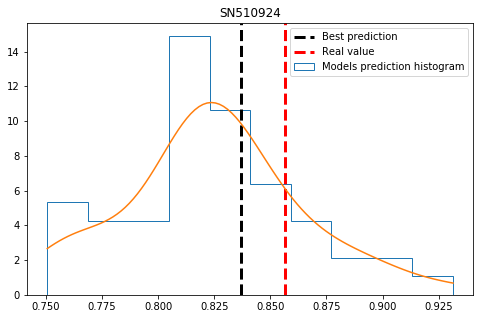

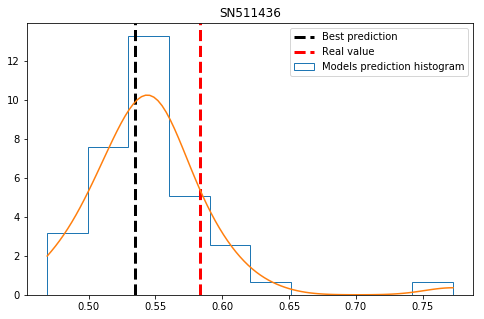

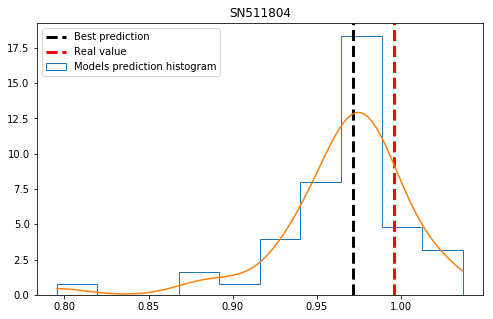

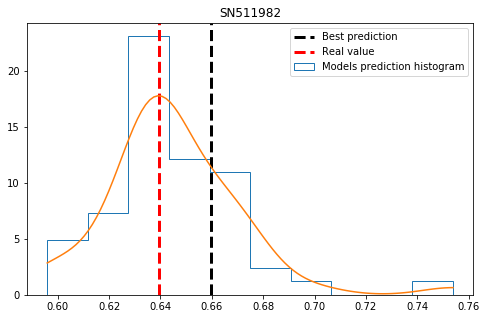

In [17]:
for i in range(4):
    print_gaussian_kde(gen_gaussian_kde(predictions[i]), predictions[i], y_real[i], y_best_pred[i], df_predictions.index[i])

In [32]:
df_kde = gen_df_gaussian_kde(df_predictions,
                             export_csv = True,
                             best_model = BEST_MODEL,
                             path = '../../data/enriched/pdf_redshift_preds.csv')

/home/fmoliveira/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [34]:
df_kde

,REDSHIFT_SPEC,StackedEnsemble_AllModels_AutoML_20201223_115349.zip,PDF
ID,,,
SN510924,0.85640,0.836854,"[0.7584974765777588, 0.83650803565979, 0.8526133419321796, 0.85056..."
SN511436,0.58313,0.534478,"[0.5076810717582703, 0.5254913568496704, 0.5430047821131541, 0.508..."
SN511804,0.99576,0.971700,"[1.0366418361663818, 0.9980481863021852, 0.9703357623215072, 0.983..."
SN511982,0.63949,0.659768,"[0.6341052055358887, 0.6204835176467896, 0.6448181378303944, 0.643..."
SN512006,0.99303,0.926702,"[0.9916722774505616, 0.9762735962867736, 0.9536867883720208, 0.933..."
...,...,...,...
SN98918,0.76083,0.874126,"[0.8799391388893127, 0.7847751379013062, 0.8449823352269833, 0.851..."
SN99404,0.89529,0.863056,"[0.8774228096008301, 0.6418916583061218, 0.7775104539226833, 0.880..."
SN99438,0.75966,0.804120,"[0.7649773359298706, 0.8203377723693848, 0.7667612498729669, 0.767..."
